In [1]:
#tweet cleaning
#https://www.kaggle.com/ragnisah/text-data-cleaning-tweets-analysis
#https://towardsdatascience.com/basic-data-cleaning-engineering-session-twitter-sentiment-data-95e5bd2869ec

#Topic Modeilling
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

#Cleaning
#Puncuation
#lower case
#stopwords
#abbreviations

# Importing modules
import pandas as pd
import os

# Load the regular expression library
import re

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk as nltk
nltk.download('stopwords')
nltk.download('wordnet')
import gensim
from gensim.utils import simple_preprocess
from gensim.models.wrappers import LdaMallet
from nltk.corpus import stopwords
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

import pyLDAvis.gensim
import pickle 
import pyLDAvis
#import spacy
#from scispacy.abbreviation import AbbreviationDetector

#sentiment analysis
#https://medium.com/swlh/simple-sentiment-analysis-for-nlp-beginners-and-everyone-else-using-vader-and-textblob-728da3dbe33d
import sqlite3
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\megha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\megha\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [2]:
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\megha\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
diabetes_covid = pd.read_csv('diabetes_2020_covid.csv')

In [4]:
# Print head
diabetes_covid

,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,Topic 7,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE
...,...,...,...,...,...,...,...,...,...
2879,gof11qu,pennynotrcutt,2021-02-22 18:51,I had mine done last week. I canâ€™t really speak for any place but the one I went to but I had ...,Topic 6,21-Feb,covid,/r/type2diabetes/comments/lpy7i8/falling_asleep_on_the_couch/gof11qu/,0
2880,gonj7lj,Superb_Science_3861,2021-02-24 17:28,Thank you!! My diet is pretty low carb most of the time. I try to stay under 30 daily. Sometimes...,Topic 1,21-Feb,covid,/r/type2diabetes/comments/lrndyr/2nd_a1c_test_done/gonj7lj/,0
2881,lrped8,MrsWorldwidee,2021-02-24 14:50,"I'm a 25 years old female and since I moved to UK 2 years ago, my physical health started to det...",Topic 2,21-Feb,covid,/r/type2diabetes/comments/lrped8/might_have_t2b/,Might have T2B
2882,gotv5vi,SavingMyFoot_DH,2021-02-26 6:00,"Yeah, that's how I did it when I was diagnosed in 2008, by fast bs was 311 (if I remember correc...",Topic 2,21-Feb,covid,/r/type2diabetes/comments/lsrxyw/new_here/gotv5vi/,0


In [5]:
#remove any blank texts
diabetes_covid = diabetes_covid[diabetes_covid['Body'].notna()]
diabetes_covid

,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,Topic 7,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE
...,...,...,...,...,...,...,...,...,...
2879,gof11qu,pennynotrcutt,2021-02-22 18:51,I had mine done last week. I canâ€™t really speak for any place but the one I went to but I had ...,Topic 6,21-Feb,covid,/r/type2diabetes/comments/lpy7i8/falling_asleep_on_the_couch/gof11qu/,0
2880,gonj7lj,Superb_Science_3861,2021-02-24 17:28,Thank you!! My diet is pretty low carb most of the time. I try to stay under 30 daily. Sometimes...,Topic 1,21-Feb,covid,/r/type2diabetes/comments/lrndyr/2nd_a1c_test_done/gonj7lj/,0
2881,lrped8,MrsWorldwidee,2021-02-24 14:50,"I'm a 25 years old female and since I moved to UK 2 years ago, my physical health started to det...",Topic 2,21-Feb,covid,/r/type2diabetes/comments/lrped8/might_have_t2b/,Might have T2B
2882,gotv5vi,SavingMyFoot_DH,2021-02-26 6:00,"Yeah, that's how I did it when I was diagnosed in 2008, by fast bs was 311 (if I remember correc...",Topic 2,21-Feb,covid,/r/type2diabetes/comments/lsrxyw/new_here/gotv5vi/,0


In [6]:
#remove posts with less than 5 words
word_count = diabetes_covid['Body'].str.split().str.len()
~(word_count < 5)

0       True
1       True
2       True
3       True
4       True
        ... 
2879    True
2880    True
2881    True
2882    True
2883    True
Name: Body, Length: 2884, dtype: bool

In [7]:
diabetes_covid = diabetes_covid [~(word_count < 5)]
diabetes_covid.head(25)

,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,Topic 7,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE
5,fq5fxvr,Lewis0108,2020-05-10 2:44,"Not the original commenter but IÃ¢â‚¬â„¢d be careful with things from Ali express, they can be s...",Topic 6,20-May,covid,/r/diabetes/comments/ggy3kj/question_about_blood_glucose_monitor/fq5fxvr/,0
6,fqeufgk,Khaetra,2020-05-12 13:02,"Eggs for breakfast (meat/cheese optional, some mornings I want bacon, others meh), sandwich usin...",Topic 1,20-May,covid,/r/diabetes/comments/gigomy/help_t2_with_bs_on_the_rise_after_a_couple_of/fqeufgk/,0
7,fqk4me0,seriousquestions000,2020-05-13 18:34,"Yeah I talked with my mom last night and decided to give him some room for now, at least until e...",Topic 3,20-May,covid,/r/diabetes/comments/gion8s/spouse_recently_diagnosed_with_type_2_diabetes/fqk4me0/,0
8,fqux4sx,GaPeach1207,2020-05-16 14:51,"They are designed to be worn for two weeks straight so you can still wear clothing, sleep on it ...",Topic 7,20-May,covid,/r/diabetes/comments/gl00jh/freestyle_libre/fqux4sx/,0
9,fqv00ix,SaucinCats,2020-05-16 15:12,Yeah I have a very hard time moving my arm or hand with an iv.. I will move the hand or arm but ...,Topic 3,20-May,covid,/r/diabetes/comments/gl00jh/freestyle_libre/fqv00ix/,0


In [8]:
#remove any duplicate posts
diabetes_covid = diabetes_covid.drop_duplicates(subset=['Body'])
diabetes_covid

,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,Topic 7,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE
...,...,...,...,...,...,...,...,...,...
2879,gof11qu,pennynotrcutt,2021-02-22 18:51,I had mine done last week. I canâ€™t really speak for any place but the one I went to but I had ...,Topic 6,21-Feb,covid,/r/type2diabetes/comments/lpy7i8/falling_asleep_on_the_couch/gof11qu/,0
2880,gonj7lj,Superb_Science_3861,2021-02-24 17:28,Thank you!! My diet is pretty low carb most of the time. I try to stay under 30 daily. Sometimes...,Topic 1,21-Feb,covid,/r/type2diabetes/comments/lrndyr/2nd_a1c_test_done/gonj7lj/,0
2881,lrped8,MrsWorldwidee,2021-02-24 14:50,"I'm a 25 years old female and since I moved to UK 2 years ago, my physical health started to det...",Topic 2,21-Feb,covid,/r/type2diabetes/comments/lrped8/might_have_t2b/,Might have T2B
2882,gotv5vi,SavingMyFoot_DH,2021-02-26 6:00,"Yeah, that's how I did it when I was diagnosed in 2008, by fast bs was 311 (if I remember correc...",Topic 2,21-Feb,covid,/r/type2diabetes/comments/lsrxyw/new_here/gotv5vi/,0


In [9]:
#remove url from text
diabetes_covid['Body'] = diabetes_covid['Body'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])
diabetes_covid['Body'] = diabetes_covid['Body'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
diabetes_covid

,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,Topic 7,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE
...,...,...,...,...,...,...,...,...,...
2879,gof11qu,pennynotrcutt,2021-02-22 18:51,I had mine done last week. I canâ€™t really speak for any place but the one I went to but I had ...,Topic 6,21-Feb,covid,/r/type2diabetes/comments/lpy7i8/falling_asleep_on_the_couch/gof11qu/,0
2880,gonj7lj,Superb_Science_3861,2021-02-24 17:28,Thank you!! My diet is pretty low carb most of the time. I try to stay under 30 daily. Sometimes...,Topic 1,21-Feb,covid,/r/type2diabetes/comments/lrndyr/2nd_a1c_test_done/gonj7lj/,0
2881,lrped8,MrsWorldwidee,2021-02-24 14:50,"I'm a 25 years old female and since I moved to UK 2 years ago, my physical health started to det...",Topic 2,21-Feb,covid,/r/type2diabetes/comments/lrped8/might_have_t2b/,Might have T2B
2882,gotv5vi,SavingMyFoot_DH,2021-02-26 6:00,"Yeah, that's how I did it when I was diagnosed in 2008, by fast bs was 311 (if I remember correc...",Topic 2,21-Feb,covid,/r/type2diabetes/comments/lsrxyw/new_here/gotv5vi/,0


In [10]:
#view gensim stopwords
all_stopwords = gensim.parsing.preprocessing.STOPWORDS
print(all_stopwords)

frozenset({'seeming', 'been', 'here', 'km', 'anyhow', 'least', 'toward', 'were', 'same', 'de', 'why', 'its', 'first', 'enough', 'across', 'thin', 'couldnt', 'six', 'however', 'over', 'many', 'from', 'for', 'should', 'bottom', 'can', 'describe', 'latter', 'yourselves', 'ie', 'also', 'seem', 'above', 'within', 'through', 'we', 'themselves', 'onto', 'amount', 'other', 'though', 'he', 'twelve', 'you', 'it', 'get', 'in', 'most', 'myself', 'whereby', 'both', 'after', 'ours', 'somehow', 'into', 'behind', 'never', 'could', 'a', 'than', 'too', 'anywhere', 'nothing', 'thick', 'against', 'each', 'formerly', 'more', 'back', 'since', 'latterly', 'when', 'or', 'because', 'empty', 'etc', 'one', 'ten', 'inc', 'give', 'please', 'us', 'otherwise', 'hers', 'show', 'keep', 'former', 'between', 'must', 'neither', 'con', 'two', 'top', 'twenty', 'eg', 'full', 'would', 'herein', 'the', 'therein', 'become', 'her', 'around', 'where', 'perhaps', 'i', 'take', 'down', 'used', 'do', 'nine', 'these', 'mill', 'toward

In [11]:
#stopword libraries https://stackabuse.com/removing-stop-words-from-strings-in-python/
#gensim stopwords
from gensim.parsing.preprocessing import remove_stopwords


#text = "Nick likes to play football, however he is not too fond of tennis."
#filtered_sentence = remove_stopwords(text)

#print(filtered_sentence)
#def remove_stopwords(text):
    #text = [word for word in text if word not in stopword]
    #print(text)
    #return text
    
#diabetes2018['text_nonstop'] = diabetes2018['text_tokenized'].apply(lambda x: remove_stopwords(x))
#diabetes2018.head(10)

diabetes_covid['text_gens_nonstop'] = diabetes_covid['Body'].apply(lambda x: remove_stopwords(x))
diabetes_covid

,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title,text_gens_nonstop
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0,"There things affect insulin sensitivity. Any changes routine, stress, getting sick, changes exer..."
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0,Why need anecdotal opinions clinical data?
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0,"One important thing remember stress affect blood sugar youÃ¢â‚¬â„¢re lot stress, like right inst..."
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0,"150-160 isn't super bad, bit high. She try lowering carbs bit try fit type exercise (even brisk ..."
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,Topic 7,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE,Hi everyone. I Type 2 diabetes. I tired easily. I try nap daily helps. When I I'm tired enjoy I'...
...,...,...,...,...,...,...,...,...,...,...
2879,gof11qu,pennynotrcutt,2021-02-22 18:51,I had mine done last week. I canâ€™t really speak for any place but the one I went to but I had ...,Topic 6,21-Feb,covid,/r/type2diabetes/comments/lpy7i8/falling_asleep_on_the_couch/gof11qu/,0,I week. I canâ€™t speak place I went I COVID test 72 hours wore mask I shown room private. The b...
2880,gonj7lj,Superb_Science_3861,2021-02-24 17:28,Thank you!! My diet is pretty low carb most of the time. I try to stay under 30 daily. Sometimes...,Topic 1,21-Feb,covid,/r/type2diabetes/comments/lrndyr/2nd_a1c_test_done/gonj7lj/,0,Thank you!! My diet pretty low carb time. I try stay 30 daily. Sometimes little. I donâ€™t exerc...
2881,lrped8,MrsWorldwidee,2021-02-24 14:50,"I'm a 25 years old female and since I moved to UK 2 years ago, my physical health started to det...",Topic 2,21-Feb,covid,/r/type2diabetes/comments/lrped8/might_have_t2b/,Might have T2B,"I'm 25 years old female I moved UK 2 years ago, physical health started deteriorate. Since I 16-..."
2882,gotv5vi,SavingMyFoot_DH,2021-02-26 6:00,"Yeah, that's how I did it when I was diagnosed in 2008, by fast bs was 311 (if I remember correc...",Topic 2,21-Feb,covid,/r/type2diabetes/comments/lsrxyw/new_here/gotv5vi/,0,"Yeah, that's I I diagnosed 2008, fast bs 311 (if I remember correctly). I took methform 45 days,..."


In [12]:
#Remove punctuations & upper case
#Remove stopwords
#Lammetization/stemming - Tranforming any form of a word to its root word
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
#remove puncutation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

diabetes_covid['text_processed'] = diabetes_covid['text_gens_nonstop'].apply(lambda x: remove_punct(x))
diabetes_covid.head(10)

,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title,text_gens_nonstop,text_processed
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0,"There things affect insulin sensitivity. Any changes routine, stress, getting sick, changes exer...",There things affect insulin sensitivity Any changes routine stress getting sick changes exercise...
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0,Why need anecdotal opinions clinical data?,Why need anecdotal opinions clinical data
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0,"One important thing remember stress affect blood sugar youÃ¢â‚¬â„¢re lot stress, like right inst...",One important thing remember stress affect blood sugar youÃ¢â‚¬â„¢re lot stress like right insta...
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0,"150-160 isn't super bad, bit high. She try lowering carbs bit try fit type exercise (even brisk ...",isnt super bad bit high She try lowering carbs bit try fit type exercise even brisk walk helps ...
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,Topic 7,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE,Hi everyone. I Type 2 diabetes. I tired easily. I try nap daily helps. When I I'm tired enjoy I'...,Hi everyone I Type diabetes I tired easily I try nap daily helps When I Im tired enjoy Ill nap ...
5,fq5fxvr,Lewis0108,2020-05-10 2:44,"Not the original commenter but IÃ¢â‚¬â„¢d be careful with things from Ali express, they can be s...",Topic 6,20-May,covid,/r/diabetes/comments/ggy3kj/question_about_blood_glucose_monitor/fq5fxvr/,0,"Not original commenter IÃ¢â‚¬â„¢d careful things Ali express, slightly janky totally accurate. I...",Not original commenter IÃ¢â‚¬â„¢d careful things Ali express slightly janky totally accurate IÃ¢...
6,fqeufgk,Khaetra,2020-05-12 13:02,"Eggs for breakfast (meat/cheese optional, some mornings I want bacon, others meh), sandwich usin...",Topic 1,20-May,covid,/r/diabetes/comments/gigomy/help_t2_with_bs_on_the_rise_after_a_couple_of/fqeufgk/,0,"Eggs breakfast (meat/cheese optional, mornings I want bacon, meh), sandwich Joseph's Lavash Pita...",Eggs breakfast meatcheese optional mornings I want bacon meh sandwich Josephs Lavash Pitas Youre...
7,fqk4me0,seriousquestions000,2020-05-13 18:34,"Yeah I talked with my mom last night and decided to give him some room for now, at least until e...",Topic 3,20-May,covid,/r/diabetes/comments/gion8s/spouse_recently_diagnosed_with_type_2_diabetes/fqk4me0/,0,"Yeah I talked mom night decided room now, cools bit. Hopefully week touch topic and. schedule ap...",Yeah I talked mom night decided room now cools bit Hopefully week touch topic and schedule appoi...
8,fqux4sx,GaPeach1207,2020-05-16 14:51,"They are designed to be worn for two weeks straight so you can still wear clothing, sleep on it ...",Topic 7,20-May,covid,/r/diabetes/comments/gl00jh/freestyle_libre/fqux4sx/,0,"They designed worn weeks straight wear clothing, sleep pressure it. If kind person gets IV stand...",They designed worn weeks straight wear clothing sleep pressure it If kind person gets IV stand b...
9,fqv00ix,SaucinCats,2020-05-16 15:12,Yeah I have a very hard time moving my arm or hand with an iv.. I wi

In [14]:
#switch to lower case
diabetes_covid['text_processed'] = \
diabetes_covid['text_processed'].map(lambda x: x.lower())
diabetes_covid

,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title,text_gens_nonstop,text_processed
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0,"There things affect insulin sensitivity. Any changes routine, stress, getting sick, changes exer...",there things affect insulin sensitivity any changes routine stress getting sick changes exercise...
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0,Why need anecdotal opinions clinical data?,why need anecdotal opinions clinical data
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0,"One important thing remember stress affect blood sugar youÃ¢â‚¬â„¢re lot stress, like right inst...",one important thing remember stress affect blood sugar youã¢â‚¬â„¢re lot stress like right insta...
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0,"150-160 isn't super bad, bit high. She try lowering carbs bit try fit type exercise (even brisk ...",isnt super bad bit high she try lowering carbs bit try fit type exercise even brisk walk helps ...
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,Topic 7,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE,Hi everyone. I Type 2 diabetes. I tired easily. I try nap daily helps. When I I'm tired enjoy I'...,hi everyone i type diabetes i tired easily i try nap daily helps when i im tired enjoy ill nap ...
...,...,...,...,...,...,...,...,...,...,...,...
2879,gof11qu,pennynotrcutt,2021-02-22 18:51,I had mine done last week. I canâ€™t really speak for any place but the one I went to but I had ...,Topic 6,21-Feb,covid,/r/type2diabetes/comments/lpy7i8/falling_asleep_on_the_couch/gof11qu/,0,I week. I canâ€™t speak place I went I COVID test 72 hours wore mask I shown room private. The b...,i week i canâ€™t speak place i went i covid test hours wore mask i shown room private the bigge...
2880,gonj7lj,Superb_Science_3861,2021-02-24 17:28,Thank you!! My diet is pretty low carb most of the time. I try to stay under 30 daily. Sometimes...,Topic 1,21-Feb,covid,/r/type2diabetes/comments/lrndyr/2nd_a1c_test_done/gonj7lj/,0,Thank you!! My diet pretty low carb time. I try stay 30 daily. Sometimes little. I donâ€™t exerc...,thank you my diet pretty low carb time i try stay daily sometimes little i donâ€™t exercise yet...
2881,lrped8,MrsWorldwidee,2021-02-24 14:50,"I'm a 25 years old female and since I moved to UK 2 years ago, my physical health started to det...",Topic 2,21-Feb,covid,/r/type2diabetes/comments/lrped8/might_have_t2b/,Might have T2B,"I'm 25 years old female I moved UK 2 years ago, physical health started deteriorate. Since I 16-...",im years old female i moved uk years ago physical health started deteriorate since i weight k...
2882,gotv5vi,SavingMyFoot_DH,2021-02-26 6:00,"Yeah, that's how I did it when I was diagnosed in 2008, by fast bs was 311 (if I remember correc...",Topic 2,21-Feb,covid,/r/type2diabetes/comments/lsrxyw/new_here/gotv5vi/,0,"Yeah, that's I I diagnosed 2008, fast bs 311 (if I remember correctly). I took methform 45 days,...",yeah thats i i diagnosed fast bs if i remember correctly i took methform days lost roughly p...


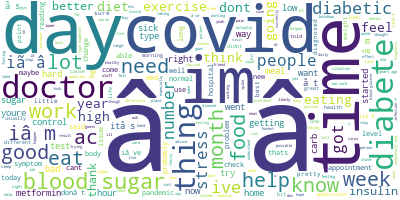

In [15]:
# Import the wordcloud library
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

# Join the different processed titles together.
long_string = ','.join(list(diabetes_covid['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [16]:
#tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

diabetes_covid['text_tokenized'] = diabetes_covid['text_processed'].apply(lambda x: tokenization(x.lower()))
diabetes_covid.head(10)

,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title,text_gens_nonstop,text_processed,text_tokenized
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0,"There things affect insulin sensitivity. Any changes routine, stress, getting sick, changes exer...",there things affect insulin sensitivity any changes routine stress getting sick changes exercise...,"[there, things, affect, insulin, sensitivity, any, changes, routine, stress, getting, sick, chan..."
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0,Why need anecdotal opinions clinical data?,why need anecdotal opinions clinical data,"[why, need, anecdotal, opinions, clinical, data]"
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0,"One important thing remember stress affect blood sugar youÃ¢â‚¬â„¢re lot stress, like right inst...",one important thing remember stress affect blood sugar youã¢â‚¬â„¢re lot stress like right insta...,"[one, important, thing, remember, stress, affect, blood, sugar, youã, â, â, re, lot, stress, lik..."
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0,"150-160 isn't super bad, bit high. She try lowering carbs bit try fit type exercise (even brisk ...",isnt super bad bit high she try lowering carbs bit try fit type exercise even brisk walk helps ...,"[, isnt, super, bad, bit, high, she, try, lowering, carbs, bit, try, fit, type, exercise, even, ..."
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,Topic 7,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE,Hi everyone. I Type 2 diabetes. I tired easily. I try nap daily helps. When I I'm tired enjoy I'...,hi everyone i type diabetes i tired easily i try nap daily helps when i im tired enjoy ill nap ...,"[hi, everyone, i, type, diabetes, i, tired, easily, i, try, nap, daily, helps, when, i, im, tire..."
5,fq5fxvr,Lewis0108,2020-05-10 2:44,"Not the original commenter but IÃ¢â‚¬â„¢d be careful with things from Ali express, they can be s...",Topic 6,20-May,covid,/r/diabetes/comments/ggy3kj/question_about_blood_glucose_monitor/fq5fxvr/,0,"Not original commenter IÃ¢â‚¬â„¢d careful things Ali express, slightly janky totally accurate. I...",not original commenter iã¢â‚¬â„¢d careful things ali express slightly janky totally accurate iã¢...,"[not, original, commenter, iã, â, â, d, careful, things, ali, express, slightly, janky, totally,..."
6,fqeufgk,Khaetra,2020-05-12 13:02,"Eggs for breakfast (meat/cheese optional, some mornings I want bacon, others meh), sandwich usin...",Topic 1,20-May,covid,/r/diabetes/comments/gigomy/help_t2_with_bs_on_the_rise_after_a_couple_of/fqeufgk/,0,"Eggs breakfast (meat/cheese optional, mornings I want bacon, meh), sandwich Joseph's Lavash Pita...",eggs breakfast meatcheese optional mornings i want bacon meh sandwich josephs lavash pitas youre...,"[eggs, breakfast, meatcheese, optional, mornings, i, want, bacon, meh, sandwich, josephs, lavash..."
7,fqk4me0,seriousquestions000,2020-05-13 18:34,"Yeah I talked with my mom last night and decided to give him some room for now, at least until e...",Topic 3,20-May,covid,/r/diabetes/comments/gion8s/spouse_recently_diagnosed_with_type_2_diabetes/fqk4me0/,0,"Yeah I talked mom night decided room now, cools 

In [17]:
#remove special characters
diabetes_covid['text_tokenized'] = diabetes_covid['text_tokenized'].apply(' '.join).str.replace('[^A-Za-z\s]+', '') \
           .str.split(expand=False)
diabetes_covid.head(10)

<ipython-input-17-88d0df6f77c6>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  diabetes_covid['text_tokenized'] = diabetes_covid['text_tokenized'].apply(' '.join).str.replace('[^A-Za-z\s]+', '') \


,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title,text_gens_nonstop,text_processed,text_tokenized
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0,"There things affect insulin sensitivity. Any changes routine, stress, getting sick, changes exer...",there things affect insulin sensitivity any changes routine stress getting sick changes exercise...,"[there, things, affect, insulin, sensitivity, any, changes, routine, stress, getting, sick, chan..."
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0,Why need anecdotal opinions clinical data?,why need anecdotal opinions clinical data,"[why, need, anecdotal, opinions, clinical, data]"
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0,"One important thing remember stress affect blood sugar youÃ¢â‚¬â„¢re lot stress, like right inst...",one important thing remember stress affect blood sugar youã¢â‚¬â„¢re lot stress like right insta...,"[one, important, thing, remember, stress, affect, blood, sugar, you, re, lot, stress, like, righ..."
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0,"150-160 isn't super bad, bit high. She try lowering carbs bit try fit type exercise (even brisk ...",isnt super bad bit high she try lowering carbs bit try fit type exercise even brisk walk helps ...,"[isnt, super, bad, bit, high, she, try, lowering, carbs, bit, try, fit, type, exercise, even, br..."
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,Topic 7,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE,Hi everyone. I Type 2 diabetes. I tired easily. I try nap daily helps. When I I'm tired enjoy I'...,hi everyone i type diabetes i tired easily i try nap daily helps when i im tired enjoy ill nap ...,"[hi, everyone, i, type, diabetes, i, tired, easily, i, try, nap, daily, helps, when, i, im, tire..."
5,fq5fxvr,Lewis0108,2020-05-10 2:44,"Not the original commenter but IÃ¢â‚¬â„¢d be careful with things from Ali express, they can be s...",Topic 6,20-May,covid,/r/diabetes/comments/ggy3kj/question_about_blood_glucose_monitor/fq5fxvr/,0,"Not original commenter IÃ¢â‚¬â„¢d careful things Ali express, slightly janky totally accurate. I...",not original commenter iã¢â‚¬â„¢d careful things ali express slightly janky totally accurate iã¢...,"[not, original, commenter, i, d, careful, things, ali, express, slightly, janky, totally, accura..."
6,fqeufgk,Khaetra,2020-05-12 13:02,"Eggs for breakfast (meat/cheese optional, some mornings I want bacon, others meh), sandwich usin...",Topic 1,20-May,covid,/r/diabetes/comments/gigomy/help_t2_with_bs_on_the_rise_after_a_couple_of/fqeufgk/,0,"Eggs breakfast (meat/cheese optional, mornings I want bacon, meh), sandwich Joseph's Lavash Pita...",eggs breakfast meatcheese optional mornings i want bacon meh sandwich josephs lavash pitas youre...,"[eggs, breakfast, meatcheese, optional, mornings, i, want, bacon, meh, sandwich, josephs, lavash..."
7,fqk4me0,seriousquestions000,2020-05-13 18:34,"Yeah I talked with my mom last night and decided to give him some room for now, at least until e...",Topic 3,20-May,covid,/r/diabetes/comments/gion8s/spouse_recently_diagnosed_with_type_2_diabetes/fqk4me0/,0,"Yeah I talked mom night decided room now, cools 

In [18]:
#remove nlk stopwords
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['get', "didnt", 'would', 'a', 'hey', 'hello', 'hi', "ive", "im", 'like', 'also','ok',
                 "don't", "I've", "I'm", "I'll", 'id', 'dont', 'wont', 'isnt', 'hadnt', 'okay', 
                 'lol', 'youre', 'youll', 'doesnt', 'ok', 'thing', 'havent', 'thats', 
                 'diabetes', 'diabetic', 'told', 'thing', 'good', 'day', 'bad', 'cant'
                 'week', 'month', 'hour','people', 'pretty', 'thank', 'want', 'start', 'started', 'ago', 'yeah', 'hasnt', 'havent'])
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
#remove nlk stopwords
def remove_nlk_stopwords(text):
    #remove nlk stopwords
    stopword = nltk.corpus.stopwords.words('english')
    stopword.extend(['get', "didnt", 'would', 'a', 'hey', 'hello', 'hi', "ive", "im", 'like', 'also','ok',
                 "don't", "I've", "I'm", "I'll", 'id', 'dont', 'wont', 'isnt', 'hadnt', 'okay', 
                 'lol', 'youre', 'youll', 'doesnt', 'ok', 'thing', 'havent', 'thats', 
                 'diabetes', 'diabetic', 'told', 'thing', 'good', 'day', 'bad', 'cant'
                 'week', 'month', 'hour','people', 'pretty', 'thank', 'want', 'start', 'started', 'ago', 'yeah', 'hasnt', 'havent'])
    text = [word for word in text if word not in stopword]
    print(text)
    return text
    
diabetes_covid['text_nlk_nonstop'] = diabetes_covid['text_tokenized'].apply(lambda x: remove_nlk_stopwords(x))
diabetes_covid.head(10)

['things', 'affect', 'insulin', 'sensitivity', 'changes', 'routine', 'stress', 'getting', 'sick', 'changes', 'exercise', 'play', 'factor', 'spikes', 'normal', 'tbh']
['need', 'anecdotal', 'opinions', 'clinical', 'data']
['one', 'important', 'remember', 'stress', 'affect', 'blood', 'sugar', 'lot', 'stress', 'right', 'instance', 'remember', 'eye', 'frequently', 'always', 'supplies', 'stocked', 'remember', 'important', 'health']
['super', 'bit', 'high', 'try', 'lowering', 'carbs', 'bit', 'try', 'fit', 'type', 'exercise', 'even', 'brisk', 'walk', 'helps', 'tell', 'stress', 'stress', 'raise', 'numbers']
['everyone', 'type', 'tired', 'easily', 'try', 'nap', 'daily', 'helps', 'tired', 'enjoy', 'ill', 'nap', 'refresh', 'suffer', 'fatigue', 'feel', 'hours', 'awake', 'feel', 'exhausted']
['original', 'commenter', 'careful', 'things', 'ali', 'express', 'slightly', 'janky', 'totally', 'accurate', 'uk', 'currently', 'link', 'monitor', 'comes', 'need', 'amazon']
['eggs', 'breakfast', 'meatcheese', '

['lonely', 'perfect', 'nuts', 'meds', 'exercise', 'etc']
['ingest', 'cordial', 'high', 'suger', 'food', 'hospital', 'rather', 'home', 'bg', 'scores', 'times', 'week']
['anybody', 'extra', 'supplies', 'live', 'texas']
['possibly', 'sick', 'example', 'bg', 'higher', 'maybe', 'simulator', 'sick']
['highs', 'lows', 'equivalent', 'basically', 'getting', 'hit', 'truck', 'severe', 'lows', 'highs', 'exhaust', 'body', 'especially', 'lows', 'hes', 'usually', 'low', 'suddenly', 'got', 'hit', 'mg', 'low', 'took', 'hospital', 'treatment', 'recover', 'days', 'feel', 'fit', 'resume', 'normal', 'tasks', 'need', 'eating', 'though', 'try', 'encourage', 'small', 'meals', 'fit', 'management', 'plan', 'eating', 'enough', 'eventually', 'curbs', 'hunger', 'point', 'feel', 'hungry', 'maybe', 'reject', 'idea', 'food', 'small', 'snack', 'kick', 'appetite', 'gear', 'eating', 'leads', 'decreased', 'energy', 'levels', 'makes', 'sense', 'hes', 'getting', 'tired', 'minimal', 'exercise', 'low', 'energy', 'persists', 

['time', 'issues', 'suspicion', 'recall', 'kid', 'trip', 'thailand', 'restaurant', 'employee', 'saw', 'mom', 'injecting', 'insulin', 'cant', 'need', 'leave', 'immediately', 'explained', 'situation', 'looked', 'suspicious', 'understood', 'sick', 'second', 'time', 'trip', 'leaving', 'thailand', 'going', 'airport', 'got', 'pulled', 'year', 'old', 'kid', 'unloaded', 'contents', 'backpack', 'plain', 'view', 'entire', 'check', 'line', 'needles', 'related', 'items', 'remember', 'scared', 'turns', 'reason', 'pulled', 'searched', 'forgotten', 'water', 'bottle', 'backpack']
['tuesday', 'cashier', 'walmart', 'tell', 'syringes', 'sell', 'insulin', 'relion', 'dog', 'able', 'flag', 'pharmacist', 'knew', 'turned', 'opposite', 'true', 'tech', 'selling', 'needles', 'learned', 'week', 'extra', 'vial', 'insulin', 'stock', 'walmart', 'runs', 'shipment', 'froze']
['high', 'worth', 'looking', 'carb', 'ratios', 'eating', 'lead', 'bed', 'correction', 'ratios', 'son', 'high', 'bedtime', 'cant', 'sleep', 'norma

['kk', 'ill', 'try', 'numbers', 'morning', 'stressing']
['ya', 'true', 'fasting', 'helps', 'tremendously', 'pandemic', 'eating', 'calms', 'balance', 'stress', 'blood', 'glucose', 'best', 'wishes', 'safe']
['located', 'minute', 'appointment', 'cost', 'bucks', 'wait']
['doctor', 'added', 'strips', 'medication', 'walmart', 'pharmacy', 'well', 'today', 'strips', 'bucks', 'insurance', 'pharmacy', 'walk', 'shelf', 'buy', 'bucks', 'gives', 'normal', 'normally', 'buy', 'otc', 'anyways', 'cheeper', 'way', 'guess']
['price', 'strips', 'place', 'depending', 'brand', 'buy', 'contour', 'next', 'strips', 'amazon', 'boxes', 'walmart']
['idea', 'meter', 'read', 'high', 'emergency', 'room', 'folks', 'concerned']
['time', 'diagnosed', 'year', 'ac', 'actually', 'think', 'tragedies', 'life', 'let', 'go', 'eating', 'badly', 'gained', 'weight', 'missing', 'medication', 'exercise', 'testing', 'getting', 'tired', 'blurry', 'vision', 'extremely', 'thirsty', 'tested', 'glucometer', 'refused', 'register', 'calle

['try', 'stop', 'stressing', 'stress', 'responsible', 'higher', 'blood', 'glucose', 'stop', 'worry', 'take', 'time', 'rest', 'mellow', 'sick', 'body', 'screaming', 'rest', 'time', 'restore', 'health', 'help', 'body', 'breathing', 'exercises', 'inhale', 'beatsseconds', 'exhale', 'beatsseconds', 'inhale', 'beatsseconds', 'microstop', 'exhale', 'bestsseconds', 'inhale', 'beatsseconds', 'hold', 'beatsseconds', 'exhale', 'beatsseconds', 'repeat', 'times', 'upwards', 'times', 'better', 'one', 'md', 'said', 'times', 'minutes', 'choose', 'measures', 'suits', 'exercise', 'daily', 'basis', 'nearly', 'back', 'exercises', 'tends', 'lower', 'anxiety', 'turmoil', 'longer', 'exhales', 'kickstarts', 'parasympathetic', 'nervous', 'help', 'body', 'lower', 'infection', 'inflammation', 'body', 'whole', 'need', 'exhale', 'longer', 'seconds', 'happen', 'breathing', 'exercises', 'positive', 'effects', 'body', 'lot', 'longer', 'mere', 'minutes', 'effects', 'need', 'breathing', 'exercises', 'long', 'exercises'

['doctor', 'guess', 'likely', 'outcome', 'going', 'infection', 'heal', 'heart', 'failure', 'event', 'things', 'come', 'pass', 'liverkidney', 'failure', 'probably', 'rdth', 'likely', 'hard', 'say', 'two', 'happen', 'tomorrow', 'second', 'two', 'months', 'wouldnt', 'bet', 'seeing', 'past']
['retails', 'supply', 'coupon', 'best', 'type', 'insurance', 'pay']
['years', 'old', 'type', 'sets', 'grandparents', 'mother', 'uncles', 'dad', 'currently', 'waiting', 'waiting', 'room', 'mother', 'affecting', 'eyes', 'affecting', 'eyes', 'past', 'years', 'insulin', 'oral', 'medications', 'struggling', 'way', 'lifestyle', 'furloughed', 'work', 'covid', 'work', 'eating', 'habits', 'changed', 'feel', 'wrong', 'mentally', 'feel', 'unmotivated', 'effect', 'causes', 'mother', 'example', 'motivation', 'vanished', 'extreme', 'approach', 'attack', 'hac', 'venting', 'post', 'hear', 'success', 'stories', 'advice']
['journey', 'discovered', 'mental', 'health', 'issues', 'exacerbating', 'physical', 'health', 'issu

['oh', 'parents', 'extremely', 'stressful', 'time', 'visit', 'huge', 'bump', 'sugars', 'use', 'cgm', 'track', 'fight', 'running', 'flight', 'something', 'similar', 'big', 'bump', 'season', 'diagnosed', 'hugely', 'stressful', 'grandma', 'living', 'diagnosed', 'cancer', 'trying', 'prevent', 'losing', 'house', 'stressed', 'cancer', 'deal']
['repeatedly', 'gp', 'educator', 'stress', 'holds', 'glucose', 'blood', 'eating', 'stuff', 'experiences', 'support', 'working', 'eating', 'well', 'stressed', 'numbers', 'great', 'holidays', 'working', 'sneaking', 'ice', 'cream', 'whatever', 'numbers', 'look', 'amazing']
['sure', 'correlation', 'anxiety', 'sets', 'random', 'physical', 'stress', 'went', 'walk', 'outside', 'freezing', 'bg', 'shot', 'seriously', 'annoying', 'benefit', 'wanted', 'exercise', 'kind', 'anxiety', 'stress', 'boost']
['diagnosed', 'months', 'october', 'th', 'ac', 'fgc', 'metformin', 'stopped', 'eating', 'fast', 'foods', 'junk', 'food', 'eating', 'healthier', 'snacks', 'cut', 'carb

['google', 'friend', 'questions', 'doctor', 'first', 'order', 'business', 'check', 'local', 'hospital', 'educator', 'department', 'appointment', 'meet', 'usually', 'training', 'classes', 'teach', 'manage', 'food', 'doctor', 'hospital', 'educators', 'access', 'medical', 'records', 'plan', 'follow', 'include', 'lower', 'carbs', 'weight', 'loss', 'goals', 'use', 'reliable', 'sources', 'information', 'surprised', 'prescribe', 'metformin']
['know', 'mexican', 'food', 'grabbing', 'easy', 'eat', 'sugarfree', 'wheat', 'tortillas', 'grocery', 'stores', 'fresh', 'fruit', 'quick', 'easy', 'snack', 'well', 'add', 'bit', 'plain', 'yogurt', 'problem', 'pcos', 'maybe', 'recommend', 'substitute', 'single', 'mother', 'hard', 'best', 'look', 'easy', 'substitutions', 'small', 'changes', 'kind', 'perfect']
['happy', 'posts', 'struggle', 'absolutely', 'struggle', 'single', 'mom', 'depressed', 'scared', 'getting', 'covid', 'health', 'struggles', 'hear', 'sub', 'talk', 'diet', 'exercise', 'ac', 'low', 'makes

['stress', 'raise', 'glucose', 'levels', 'ps', 'add', 'metformin', 'diet']
['basically', 'years', 'pandemic', 'took', 'meds', 'let', 'chips', 'fall', 'may', 'fear', 'covid', 'help', 'much', 'shit', 'got', 'real', 'helped', 'pain', 'minor', 'painful', 'nagging', 'injury', 'couldnt', 'treated', 'sugars', 'high', 'six', 'months', 'pain', 'making', 'small', 'changes', 'checking', 'sugars', 'changing', 'diet', 'counting', 'carbs', 'daily', 'exercise', 'eventually', 'got', 'treated', 'injury', 'injury', 'healed', 'healthy', 'habits', 'stuck', 'advice', 'cant', 'change', 'behavior', 'small', 'steps', 'measure', 'progress', 'supportive', 'prepare', 'contingencies', 'husband', 'suffer', 'major', 'complication', 'change', 'prepare']
['bought', 'thanks', 'link', 'kindle']
['yes', 'absolutely', 'money', 'new', 'dm', 'called', 'north', 'county', 'saturday', 'stay', 'close']
['ignore', 'preconceived', 'ideas', 'things', 'know', 'life', 'health', 'battles', 'fight', 'soon', 'friend', 'fighting', 'bat

['clear', 'ophthalmologist', 'saw', 'retina', 'specialist', 'said', 'grey', 'spots', 'micro', 'aneurisms', 'uncontrolled', 'blood', 'sugar', 'disclose', 'injections', 'laser', 'treatments', 'avaiable', 'insisted', 'bleedsspots', 'heal', 'clear', 'months', 'tight', 'blood', 'sugar', 'control', 'mgdl', 'said', 'treatments', 'run', 'risk', 'leaving', 'scar', 'leave', 'permanent', 'spot', 'vision', 'second', 'opinion']
['clear', 'ophthalmologist', 'saw', 'retina', 'specialist', 'said', 'grey', 'spots', 'micro', 'aneurisms', 'uncontrolled', 'blood', 'sugar', 'disclose', 'injections', 'laser', 'treatments', 'available', 'insisted', 'bleedsspots', 'heal', 'clear', 'months', 'tight', 'blood', 'sugar', 'control', 'mgdl', 'said', 'treatments', 'run', 'risk', 'leaving', 'scar', 'leave', 'permanent', 'spot', 'vision', 'lattice', 'degeneration', 'eyes', 'ophthalmologist', 'laser', 'seal', 'holestears', 'sounds', 'know', 'lot', 'subject', 'consider', 'getting', 'second', 'opinion', 'worried', 'grey'

['share', 'example', 'hemodialysis', 'unit', 'work', 'making', 'sure', 'patients', 'immunocompromised', 'safe', 'exhibiting', 'symptoms', 'untoward', 'complications', 'occur', 'contract', 'virus']
['guys', 'f', 'life', 'normal', 'weight', 'height', 'around', 'years', 'gained', 'pounds', 'year', 'know', 'overeating', 'stress', 'sure', 'gained', 'much', 'heavy', 'something', 'noticed', 'end', 'weight', 'gain', 'stopped', 'certain', 'point', 'guess', 'sweet', 'iced', 'tea', 'dessert', 'constantly', 'pee', 'urge', 'come', 'suddenly', 'avoided', 'sugary', 'months', 'problem', 'went', 'away', 'eventually', 'sugar', 'leaking', 'tiny', 'urine', 'ate', 'drank', 'sweet', 'manage', 'problem', 'avoiding', 'mind', 'dealing', 'obviously', 'quarantine', 'stuffing', 'faces', 'yesterday', 'ate', 'bag', 'milanos', 'nutella', 'judge', 'lmao', 'blood', 'urine', 'today', 'got', 'weird', 'hot', 'flash', 'warm', 'red', 'face', 'abdominal', 'pain', 'going', 'urgent', 'care', 'tomorrow', 'bc', 'think', 'uti', 

['arent', 'super', 'happy', 'iowa', 'dakotas']
['stock', 'along', 'standard', 'freezer', 'live', 'conscience', 'effort', 'stock', 'things', 'fine', 'reminds', 'toilet', 'paper', 'debacle', 'keep', 'calm', 'carry']
['issue', 'getting', 'eggs', 'daily', 'breakfast', 'nuts', 'reminded', 'unshelled', 'peanuts', 'generally', 'stock', 'nerves', 'able', 'eat', 'safely', 'weeks', 'food', 'us']
['ya', 'even', 'toilet', 'paper', 'buy', 'couple', 'rolls', 'time', 'great', 'tp', 'shortage', 'insane', 'luckily', 'local', 'market', 'stocked', 'things', 'unfortunately', 'cold', 'cuts', 'frozen', 'burgers', 'meat', 'eye', 'things', 'buy', 'use']
['december', 'heavy', 'workout', 'routine', 'took', 'lbs', 'january', 'diagnosed', 'end', 'january', 'gone', 'normal', 'checkup', 'random', 'sampling', 'ac', 'immediately', 'ozempic', 'supposed', 'followup', 'appointment', 'hell', 'experience', 'freaked', 'ate', 'basically', 'carbs', 'ate', 'sugar', 'added', 'sugar', 'gone', 'diet', 'starvation', 'diet', 'cant

['first', 'post', 'recently', 'type', 'absolutely', 'threw', 'loop', 'completely', 'blindsided', 'idea', 'combat', 'felt', 'overwhelmed', 'covid', 'going', 'couldnt', 'edno', 'today', 'diagnosed', 'ac', 'count', 'carbs', 'physically', 'active', 'taking', 'metformin', 'endo', 'rough', 'frustrated', 'feeling', 'decided', 'completely', 'change', 'lifestyle', 'joggingcycling', 'everyday', 'crazy', 'distances', 'finally', 'appointment', 'today', 'endo', 'today', 'sweat', 'tears', 'frustrationanger', 'countless', 'upset', 'stomaches', 'metformin', 'ac', 'today', 'felt', 'great', 'know', 'hardwork', 'pay', 'lurking', 'diagnosis', 'goes', 'newly', 'diagnosed', 'frustrated', 'diagnosis', 'alone', 'keep', 'grinding', 'take', 'time', 'conquercontrol', 'frustrating', 'disease', 'cheers']
['amazing', 'congrats', 'imagine', 'hard', 'work', 'ac', 'similar', 'able', 'test', 'late', 'corona', 'pump', 'excited', 'pumping', 'ac']
['going', 'doctor', 'tested', 'type', 'let', 'know', 'results', 'questions'

['eye', 'personally', 'recommend', 'going', 'florida', 'anyone', 'let', 'disney', 'things', 'different', 'decemberthough', 'caution', 'given', 'florida', 'reluctance', 'follow', 'national', 'covid', 'guidelines', 'governor', 'denial', 'virus', 'gravity', 'ultimately', 'decisionbut', 'type', 'disney']
['response', 'agree', 'florida', 'stopping', 'gas', 'state', 'friend', 'sent', 'article', 'interesting', 'disney', 'world', 'many', 'saying', 'island', 'safety', 'inside', 'state', 'ravaged', 'disease', 'said', 'ticket', 'reservation', 'mask', 'fever']
['ps', 'love', 'places', 'florida', 'knocking', 'state', 'controlling', 'covid', 'places']
['totally', 'agree', 'safe', 'placebut', 'thought', 'letting', 'come', 'confirmed', 'reservations', 'season', 'passes', 'changed', 'news', 'heard', 'constantly', 'running', 'lot', 'promos', 'local', 'reservations', 'require', 'buy', 'tickets', 'ahead', 'buy', 'park', 'think', 'right', 'come', 'contact', 'anyone', 'large', 'party', 'shown', 'symptoms', 

['got', 'ac', 'test', 'result', 'result', 'months', 'prediabetic', 'appointment', 'doctor', 'discuss', 'weeks', 'kind', 'jump', 'possible', 'anomaly', 'crushed', 'right', 'time', 'reverse', 'things', 'seeing', 'close', 'prediabetic', 'working', 'covid', 'sedentary', 'big', 'jump', 'quickly', 'wrong', 'likely', 'tests', 'required', 'determine', 'thanks', 'insight']
['contracted', 'covid', 'early', 'november', 'despite', 'taking', 'precautions', 'thanks', 'antimaskers', 'week', 'mark', 'hospitalized', 'oxygen', 'levels', 'dipping', 'mids', 'oxygen', 'remdesevir', 'dexamethasone', 'steroids', 'discharged', 'week', 'later', 'improved', 'sufficiently', 'needed', 'bed', 'constant', 'stream', 'covictims', 'hospital', 'received', 'number', 'insulin', 'shots', 'time', 'life', 'ostensibly', 'counteract', 'effects', 'steroids', 'fair', 'enough', 'halflife', 'dexamethasone', 'short', 'cleared', 'body', 'couple', 'days', 'weeks', 'discharge', 'waking', 'bg', 'precovid', 'bg', 'mornings', 'web', 'se

['appointment', 'nyc', 'hard', 'impossibly', 'time', 'finding', 'appointments', 'td', 'thanks']
['lmk', 'luck', 'calling', 'checking', 'opened']
['heard', 'endo', 'armory', 'starting', 'td', 'tuesday']
['mothers', 'blood', 'sugar', 'mmol', 'mmol', 'past', 'weeks', 'contacted', 'nurse', 'needs', 'insulin', 'currently', 'taking', 'glicazide', 'trulicity', 'injections', 'however', 'longer', 'work', 'problem', 'current', 'pandemic', 'wait', 'hospital', 'appointment', 'available', 'specialist', 'prescribe', 'insulin', 'months', 'away', 'however', 'checking', 'blood', 'sugar', 'twice', 'usually', 'high', 'early', 'checked', 'cupboards', 'fridge', 'carb', 'loaded', 'sugar', 'stuffed', 'foods', 'cant', 'stop', 'eating', 'wants', 'worried', 'health', 'ever', 'insane', 'diharreah', 'curious', 'long', 'sugars', 'stay', 'high', 'permanent', 'damage', 'dealt', 'thanks']
['go', 'emergency', 'room', 'advice', 'incredibly', 'dangerous', 'stay', 'levels', 'long', 'time', 'begs', 'question', 'fact', 'ty

['around', 'percent', 'contracted', 'virus', 'died', 'example', 'percent', 'high', 'blood', 'pressure']
['wonder', 'related', 'age']
['fair', 'point', 'read', 'articles', 'diabetescovid', 'diabetics', 'high', 'risk', 'covid', 'seen', 'age', 'statistics', 'though']
['data', 'yet']
['state', 'cases', 'sure', 'number', 'lack', 'testing', 'gtprobably', 'better', 'chance', 'dying', 'flu', 'know', 'true', 'fuck', 'knew', 'wasnt', 'true', 'posted', 'comment', 'cdc', 'says', 'chance', 'diabetics']
['uphlashmanusa', 'corona', 'worried', 'ones', 'fridge', 'uphlashmanusa', 'days', 'bouts', 'symptoms', 'beginning', 'worried']
['super', 'stressful', 'week', 'turned', 'food', 'food', 'eating', 'twice', 'drinking', 'soda', 'candy', 'chips', 'drinking', 'water', 'feel', 'failure', 'gone', 'rails', 'feel', 'stop', 'comfort', 'eating', 'food', 'right', 'months', 'got', 'diagnosed', 'afraid', 'test', 'blood', 'sugars']
['gestures', 'familysize', 'bag', 'potato', 'chips', 'bedroom', 'floor', 'pandemic', '

['cool', 'blood', 'sugar', 'high', 'long', 'tried', 'think', 'wouldnt', 'range', 'week', 'second', 'antibiotics', 'know', 'things', 'affect']
['antibiotics', 'alter', 'glucose', 'metabolism', 'significantly']
['wife', 'got', 'fired', 'job', 'cruise', 'industry', 'oh', 'well']
['oh', 'jeez', 'sorry', 'sick', 'plan', 'follow', 'stay', 'safe']
['sick', 'plan']
['room', 'ac', 'vents', 'sealed', 'window', 'remains', 'open', 'lot', 'hydration', 'fever', 'reducing', 'pills', 'bathroom', 'silverware', 'food', 'window', 'cleaned', 'clorox', 'hot', 'water', 'meals', 'time', 'veggies', 'cheese', 'intermittent', 'fasting', 'lots', 'rest']
['thanks', 'helpful', 'recently', 'diagnosed', 'doctor', 'terrible', 'know']
['oh', 'yikes', 'sorry', 'hear', 'idea', 'dietician', 'possible', 'guidelines', 'carb', 'intake', 'etc', 'feel', 'better']
['sure', 'wish', 'luxury', 'room', 'follow', 'alas']
['thanks', 'sort', 'figured', 'carb', 'intake', 'thanks', 'online', 'research', 'dietitian', 'idea', 'though']
[

['wish', 'health', 'especially', 'times']
['ac', 'control', 'yes', 'vulnerable', 'controlled', 'diabetics', 'vulnerable', 'article', 'info', 'taken', 'jdrf', 'question', 'answer', 'type', 'article', 'endocrinologist', 'referencing', 'diabetics', 'acs', 'example', 'controlled']
['year', 'ac', 'mids', 'closing', 'gym', 'factors', 'led', 'food', 'choices', 'ac', 'lt', 'time', 'around', 'ill', 'happy', 'guess']
['sure', 'fine', 'need', 'drastic', 'change', 'diet', 'ac', 'jump', 'control']
['telemedicine', 'appointment', 'doctor', 'friday', 'awesome', 'lab', 'work', 'super', 'easy']
['congrats', 'tried', 'eat', 'dark', 'chocolate', 'sugarfree', 'quarantine', 'changing', 'lifestyle', 'diet']
['need', 'thread', 'survivors', 'stories', 'covid', 'virus', 'nuts', 'depressed', 'hear', 'combination', 'blood', 'pressure', 'corona', 'deadly', 'last', 'minutes', 'neighbor', 'died', 'corona', 'known', 'bp', 'metformin', 'bp', 'hiding', 'home', 'weeks']
['obviously', 'survivors', 'right', 'important', 

['whats', 'daily', 'routine', 'diet']
['stress', 'poor', 'sleep', 'definitely', 'affect', 'numbers', 'sorry', 'hear', 'sister']
['stress', 'raises', 'cortisol', 'raises', 'glucose', 'levels']
['please', 'accept', 'sympathy', 'sorry', 'sister', 'passed']
['yes', 'stress', 'caused', 'numbers', 'wack', 'honestly', 'maybe', 'shouldnt', 'care', 'numbers', 'ac', 'test', 'dealing', 'tragedy', 'happened', 'yesterday', 'sweets', 'moderation', 'deal', 'overwhelming', 'stress', 'death', 'balance', 'scheduling', 'lowsugar', 'carb', 'meals', 'meals', 'need', 'coping', 'amp', 'comfort', 'time', 'unhealthy', 'st', 'glance', 'condolences', 'amp', 'family', 'loss']
['definitely', 'cause', 'think', 'specific', 'instance', 'cake', 'culprit', 'sorry', 'loss']
['sorry', 'sister', 'cake', 'cupcake', 'likely', 'caused', 'spike', 'yes', 'stress', 'cause', 'spikes']
['staying', 'home', 'low', 'carbs', 'lots', 'chicken']
['condolences', 'sister', 'relate', 'got', 'diagnosis', 'covid', 'past', 'tuesday', 'plus',

['one', 'seen', 'preliminary', 'research', 'vitamin', 'vitamin', 'deficiencies', 'marker', 'covid', 'complications', 'since', 'daily', 'minute', 'walk', 'vitamin', 'blood', 'sugar', 'definitely', 'suggest', 'well', 'think', 'heard', 'vitamin', 'insulin', 'response', 'remember', 'heard', 'quote']
['well', 'recent', 'diagnosis', 'hit', 'hard', 'given', 'knee', 'jerk', 'reaction', 'typical', 'intake', 'wheat', 'toast', 'glass', 'milk', 'morning', 'medium', 'bowl', 'home', 'barleymillet', 'cooked', 'vegetables', 'lunch', 'maybe', 'boiled', 'egg', 'sandwich', 'barleymillet', 'leftover', 'dinner', 'believe', 'drink', 'plenty', 'water', 'pee', 'colorless', 'point', 'chug', 'water', 'tinge', 'color', 'brisk', 'walk', 'miles', 'miles', 'miles', 'pm', 'lockdown', 'making', 'currently', 'possible', 'lets', 'goes', 'things', 'normal', 'definitely', 'ketoacidosis', 'prior', 'diagnosis', 'lost', 'close', 'lbsso', 'went', 'lbs', 'lbs', 'currently', 'ac', 'came', 'maybe', 'body', 'trying', 'rid', 'ext

['ill', 'look', 'ordering', 'weights', 'online', 'outside', 'f', 'humidity', 'masks', 'mandatory']
['wake', 'feet', 'feel', 'numb', 'year', 'earlier', 'year', 'feet', 'felt', 'normal', 'late', 'may', 'year', 'got', 'feet', 'issue', 'thought', 'alcoholic', 'neuropathy', 'quit', 'drinking', 'problem', 'drinker', 'personal', 'choice', 'advice', 'drank', 'zero', 'carb', 'ethanol', 'gram', 'carb', 'beer', 'grams', 'net', 'carbs', 'gained', 'weight', 'belly', 'male', 'cutting', 'carbs', 'gather', 'carb', 'sensitive', 'obese', 'eat', 'carbs', 'ac', 'said', 'work', 'foods', 'low', 'carb', 'feel', 'hunger', 'enemy', 'ac', 'calculators', 'online', 'plug', 'glucose', 'level', 'box', 'need', 'know', 'lower', 'nature', 'red', 'blood', 'cells', 'ac', 'tests', 'assume', 'live', 'months', 'change', 'ac', 'measurement', 'skewed', 'conditions', 'liver', 'panel', 'perfect', 'exercise', 'resistance', 'training', 'active', 'months', 'janmarch', 'experience', 'tidy', 'better', 'readings', 'today', 'cm', 'po

['walk', 'hours', 'drink', 'plenty', 'water', 'lifting', 'weights', 'eat', 'zero', 'carbketo', 'order', 'weights', 'walmartamazon', 'eating', 'carbs', 'taking', 'units', 'fast', 'acting']
['water', 'drinking', 'daily', 'tried', 'strengthresistance', 'training', 'doctor', 'says', 'best', 'mix', 'routine', 'daily', 'muscle', 'confusion']
['recent', 'lab', 'results', 'iron', 'levels', 'normal', 'wouldnt', 'think', 'hemochromatosis', 'table', 'question', 'ask', 'doctor', 'experience', 'fatigue', 'pain', 'abdomen', 'times', 'fatigue', 'response', 'high', 'blood', 'sugars', 'pain', 'abdomen', 'probably', 'unrelated']
['advice', 'cgm', 'currently', 'pandemic', 'laid', 'job', 'unable', 'pay', 'health', 'insurance', 'right', 'cgm', 'card']
['sorry', 'hear', 'hapening', 'far', 'days', 'look', 'government', 'assistance', 'pay', 'pocket', 'medications', 'form', 'insurance', 'copay', 'assistance', 'helps', 'medications', 'help', 'cgm']
['especially', 'important', 'flu', 'shot', 'fall']
['update', '

['typical', 'job', 'anymore', 'stay', 'home', 'mom', 'time', 'teacher', 'covid', 'unfortunately', 'diagnosis', 'lot', 'energetic', 'positive', 'overall', 'diagnosed', 'january', 'shit', 'weeks', 'diagnosis', 'felt', 'absolutely', 'shit', 'tired', 'tingly', 'pokes', 'massive', 'weight', 'loss', 'depressed', 'disease', 'depression', 'ramp', 'feel', 'sucks', 'happy', 'energetic', 'overall', 'thirst', 'peeing', 'lot', 'night', 'owl', 'wake', 'bed', 'ac', 'blood', 'sugar', 'ranges', 'feel', 'shit', 'lot', 'time', 'worry', 'happen', 'office', 'job', 'maybe', 'extra', 'movement', 'exercise', 'right', 'housework', 'playing', 'son', 'lose', 'anymore', 'weight']
['late', 'time', 'desk', 'job', 'working', 'home', 'diagnosed', 'august', 'hand', 'working', 'home', 'blessing', 'fit', 'exercise', 'getting', 'kids', 'school', 'control', 'food', 'intake', 'bg', 'measuring', 'easily', 'sit', 'laptop', 'long', 'periods', 'inactivity', 'whereas', 'sit', 'working', 'hours', 'problem', 'snack', 'desk', 'thi

['keto', 'hospital', 'medical', 'reason', 'bg', 'higher', 'hospital', 'reason', 'bit', 'complex', 'endo', 'worry', 'return', 'normal', 'diet', 'home', 'adjust', 'meds', 'needed']
['thanks', 'recommendation', 'tried', 'fun', 'show']
['sorry', 'sick', 'try', 'worry', 'blood', 'sugars', 'illbeing', 'sick', 'affect', 'blood', 'glucose', 'matter', 'bump', 'road', 'permanent', 'change']
['depends', 'level', 'sites', 'read', 'diabetics', 'result', 'doctor', 'normal', 'times', 'head', 'er', 'level', 'high', 'hospital', 'overrun', 'covid', 'issue', 'kaiser', 'permanente', 'site', 'illness']
['emergency', 'situation', 'caused', 'body', 'reaction', 'illness', 'aware', 'super', 'sick', 'believe', 'staying', 'hydrated', 'help', 'lot', 'dad', 'case', 'stomach', 'flu', 'water', 'dehydration', 'played', 'role', 'super', 'high', 'blood', 'sugar']
['gave', 'sugary', 'treats', 'years', 'got', 'went', 'limited', 'specific', 'types', 'sight', 'mind', 'works', 'buy', 'commercial', 'cookies', 'make', 'mom', 

['lot', 'meds', 'ac', 'check', 'dec', 'long', 'story', 'short', 'teacher', 'switching', 'new', 'virtual', 'teaching', 'environment', 'rocked', 'physical', 'activity', 'gone', 'gave', 'everything', 'focused', 'work', 'paid', 'price', 'ac', 'really', 'hope', 'control', 'exercising', 'right', 'need', 'patience']
['hospitals', 'full', 'corona']
['hospital', 'wear', 'mask', 'practice', 'social', 'distancing', 'doctor']
['great', 'news', 'diabetics', 'metformin', 'hyper', 'careful', 'work', 'home', 'basically', 'leave', 'absolutely', 'occur', 'cant', 'happen', 'teleconference', 'going', 'run', 'street', 'kissing']
['doctor', 'appointment', 'especially', 'effects', 'medication', 'drug', 'choices', 'doctor', 'another', 'insurance', 'directory', 'local', 'endocrinologists', 'schedule', 'virtual', 'appointment', 'pcp', 'tell', 'himher', 'recommend', 'else', 'running', 'work']
['swab', 'covid', 'amp', 'caught', 'covid', 'october', 'think', 'affect', 'sure', 'right', 'symptoms', 'october', 'amp', 

['suggestion', 'contact', 'care', 'team', 'suggest', 'sometimes', 'meds', 'things', 'try', 'step', 'track', 'glucose', 'readings', 'best']
['try', 'mindfulness', 'endorsing', 'site', 'showing', 'example']
['yes', 'stress', 'increase', 'bg', 'sure', 'suggested', 'contact', 'care', 'team']
['mention', 'medication', 'controlling', 'diet', 'exercise']
['sorry', 'yes', 'metformin', 'mg']
['tried', 'need', 'list']
['taking', 'time', 'answer', 'ill', 'reach']
['suggestion', 'practices', 'definitely', 'reap', 'benefits']
['sounds', 'ill', 'reach', 'guess', 'solution', 'dose', 'metformin']
['gt', 'sugar', 'range', 'problem', 'past', 'spiking', 'high', 'levels', 'ss', 'etc', 'fasting', 'premeal', 'tests', 'test', 'meals', 'gtmy', 'diet', 'unchanged', 'sounds', 'needs', 'effective', 'action', 'reduce', 'numbers', 'reduce', 'stress', 'technique', 'help', 'try', 'week', 'click', 'test', 'review', 'adjust']
['free', 'painless', 'hurt']
['probably', 'best', 'solution', 'increase', 'stress', 'progress

['probably', 'risk', 'lot', 'type', 'come', 'obesity']
['saw', 'article', 'statement', 'policy', 'basically', 'said', 'type', 'ac', 'eligible', 'vaccine']
['woah', 'american', 'heard', 'canada', 'immediate', 'vaccination', 'makes', 'sense', 'trying', 'vulnerable', 'vaccinated', 'first']
['prediabetic', 'years', 'yo', 'problems', 'got', 'covid', 'weeks', 'week', 'noticed', 'dying', 'thirst', 'constantly', 'drink', 'ounces', 'water', 'daily', 'couldnt', 'quenched', 'mother', 'type', 'tested', 'blood', 'sugar', 'went', 'hospital', 'fluids', 'insulin', 'er', 'doc', 'happening', 'prediabetics', 'gotten', 'covid', 'blood', 'sugar', 'skyrockets', 'drs', 'arent', 'sure', 'yet', 'januvia', 'jardiance', 'testing', 'daily', 'blood', 'sugar', 'upper', 'prediabetic', 'hoping']
['high', 'mean', 'gone', 'type', 'heard', 'stories', 'non', 'diabetics', 'covid', 'weird']
['neglected', 'mention', 'taking', 'metformin', 'keeping', 'numbers', 'lt', 'covid', 'caused', 'spike', 'currently', 'doctor', 'said',

,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title,text_gens_nonstop,text_processed,text_tokenized,text_nlk_nonstop
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0,"There things affect insulin sensitivity. Any changes routine, stress, getting sick, changes exer...",there things affect insulin sensitivity any changes routine stress getting sick changes exercise...,"[there, things, affect, insulin, sensitivity, any, changes, routine, stress, getting, sick, chan...","[things, affect, insulin, sensitivity, changes, routine, stress, getting, sick, changes, exercis..."
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0,Why need anecdotal opinions clinical data?,why need anecdotal opinions clinical data,"[why, need, anecdotal, opinions, clinical, data]","[need, anecdotal, opinions, clinical, data]"
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0,"One important thing remember stress affect blood sugar youÃ¢â‚¬â„¢re lot stress, like right inst...",one important thing remember stress affect blood sugar youã¢â‚¬â„¢re lot stress like right insta...,"[one, important, thing, remember, stress, affect, blood, sugar, you, re, lot, stress, like, righ...","[one, important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember,..."
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0,"150-160 isn't super bad, bit high. She try lowering carbs bit try fit type exercise (even brisk ...",isnt super bad bit high she try lowering carbs bit try fit type exercise even brisk walk helps ...,"[isnt, super, bad, bit, high, she, try, lowering, carbs, bit, try, fit, type, exercise, even, br...","[super, bit, high, try, lowering, carbs, bit, try, fit, type, exercise, even, brisk, walk, helps..."
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,Topic 7,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE,Hi everyone. I Type 2 diabetes. I tired easily. I try nap daily helps. When I I'm tired enjoy I'...,hi everyone i type diabetes i tired easily i try nap daily helps when i im tired enjoy ill nap ...,"[hi, everyone, i, type, diabetes, i, tired, easily, i, try, nap, daily, helps, when, i, im, tire...","[everyone, type, tired, easily, try, nap, daily, helps, tired, enjoy, ill, nap, refresh, suffer,..."
5,fq5fxvr,Lewis0108,2020-05-10 2:44,"Not the original commenter but IÃ¢â‚¬â„¢d be careful with things from Ali express, they can be s...",Topic 6,20-May,covid,/r/diabetes/comments/ggy3kj/question_about_blood_glucose_monitor/fq5fxvr/,0,"Not original commenter IÃ¢â‚¬â„¢d careful things Ali express, slightly janky totally accurate. I...",not original commenter iã¢â‚¬â„¢d careful things ali express slightly janky totally accurate iã¢...,"[not, original, commenter, i, d, careful, things, ali, express, slightly, janky, totally, accura...","[original, commenter, careful, things, ali, express, slightly, janky, totally, accurate, uk, cur..."
6,fqeufgk,Khaetra,2020-05-12 13:02,"Eggs for breakfast (meat/cheese optional, some mornings I want bacon, others meh), sandwich usin...",Topic 1,20-May,covid,/r/diabetes/comments/gigomy/help_t2_with_bs_on_the_rise_after_a_couple_of/fqeufgk/,0,"Eggs breakfast (meat/cheese optiona

In [20]:
#spacy stopwords
import spacy
sp = spacy.load('en_core_web_sm')

all_spacy_stopwords = sp.Defaults.stop_words
print(len(all_stopwords))
print(all_stopwords)

337
frozenset({'seeming', 'been', 'here', 'km', 'anyhow', 'least', 'toward', 'were', 'same', 'de', 'why', 'its', 'first', 'enough', 'across', 'thin', 'couldnt', 'six', 'however', 'over', 'many', 'from', 'for', 'should', 'bottom', 'can', 'describe', 'latter', 'yourselves', 'ie', 'also', 'seem', 'above', 'within', 'through', 'we', 'themselves', 'onto', 'amount', 'other', 'though', 'he', 'twelve', 'you', 'it', 'get', 'in', 'most', 'myself', 'whereby', 'both', 'after', 'ours', 'somehow', 'into', 'behind', 'never', 'could', 'a', 'than', 'too', 'anywhere', 'nothing', 'thick', 'against', 'each', 'formerly', 'more', 'back', 'since', 'latterly', 'when', 'or', 'because', 'empty', 'etc', 'one', 'ten', 'inc', 'give', 'please', 'us', 'otherwise', 'hers', 'show', 'keep', 'former', 'between', 'must', 'neither', 'con', 'two', 'top', 'twenty', 'eg', 'full', 'would', 'herein', 'the', 'therein', 'become', 'her', 'around', 'where', 'perhaps', 'i', 'take', 'down', 'used', 'do', 'nine', 'these', 'mill', 'to

In [21]:
#remove spacy stopwords from text

def remove_spacy_stopwords(text):
    text = [word for word in text if word not in all_spacy_stopwords]
    #print(text)
    return text
    
diabetes_covid['text_nonstop_spacy'] = diabetes_covid['text_nlk_nonstop'].apply(lambda x: remove_spacy_stopwords(x))
diabetes_covid.head(25)

,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title,text_gens_nonstop,text_processed,text_tokenized,text_nlk_nonstop,text_nonstop_spacy
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0,"There things affect insulin sensitivity. Any changes routine, stress, getting sick, changes exer...",there things affect insulin sensitivity any changes routine stress getting sick changes exercise...,"[there, things, affect, insulin, sensitivity, any, changes, routine, stress, getting, sick, chan...","[things, affect, insulin, sensitivity, changes, routine, stress, getting, sick, changes, exercis...","[things, affect, insulin, sensitivity, changes, routine, stress, getting, sick, changes, exercis..."
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0,Why need anecdotal opinions clinical data?,why need anecdotal opinions clinical data,"[why, need, anecdotal, opinions, clinical, data]","[need, anecdotal, opinions, clinical, data]","[need, anecdotal, opinions, clinical, data]"
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0,"One important thing remember stress affect blood sugar youÃ¢â‚¬â„¢re lot stress, like right inst...",one important thing remember stress affect blood sugar youã¢â‚¬â„¢re lot stress like right insta...,"[one, important, thing, remember, stress, affect, blood, sugar, you, re, lot, stress, like, righ...","[one, important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember,...","[important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember, eye,..."
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0,"150-160 isn't super bad, bit high. She try lowering carbs bit try fit type exercise (even brisk ...",isnt super bad bit high she try lowering carbs bit try fit type exercise even brisk walk helps ...,"[isnt, super, bad, bit, high, she, try, lowering, carbs, bit, try, fit, type, exercise, even, br...","[super, bit, high, try, lowering, carbs, bit, try, fit, type, exercise, even, brisk, walk, helps...","[super, bit, high, try, lowering, carbs, bit, try, fit, type, exercise, brisk, walk, helps, tell..."
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,Topic 7,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE,Hi everyone. I Type 2 diabetes. I tired easily. I try nap daily helps. When I I'm tired enjoy I'...,hi everyone i type diabetes i tired easily i try nap daily helps when i im tired enjoy ill nap ...,"[hi, everyone, i, type, diabetes, i, tired, easily, i, try, nap, daily, helps, when, i, im, tire...","[everyone, type, tired, easily, try, nap, daily, helps, tired, enjoy, ill, nap, refresh, suffer,...","[type, tired, easily, try, nap, daily, helps, tired, enjoy, ill, nap, refresh, suffer, fatigue, ..."
5,fq5fxvr,Lewis0108,2020-05-10 2:44,"Not the original commenter but IÃ¢â‚¬â„¢d be careful with things from Ali express, they can be s...",Topic 6,20-May,covid,/r/diabetes/comments/ggy3kj/question_about_blood_glucose_monitor/fq5fxvr/,0,"Not original commenter IÃ¢â‚¬â„¢d careful things Ali express, slightly janky totally accurate. I...",not original commenter iã¢â‚¬â„¢d careful things ali express slightly janky totally accurate iã¢...,"[not, ori

In [22]:
#remove less than 5 words again
word_count = diabetes_covid['text_processed'].str.split().str.len()
~(word_count < 5)

0       True
1       True
2       True
3       True
4       True
        ... 
2879    True
2880    True
2881    True
2882    True
2883    True
Name: text_processed, Length: 2791, dtype: bool

In [23]:
diabetes_covid = diabetes_covid [~(word_count < 5)]
diabetes_covid

,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title,text_gens_nonstop,text_processed,text_tokenized,text_nlk_nonstop,text_nonstop_spacy
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0,"There things affect insulin sensitivity. Any changes routine, stress, getting sick, changes exer...",there things affect insulin sensitivity any changes routine stress getting sick changes exercise...,"[there, things, affect, insulin, sensitivity, any, changes, routine, stress, getting, sick, chan...","[things, affect, insulin, sensitivity, changes, routine, stress, getting, sick, changes, exercis...","[things, affect, insulin, sensitivity, changes, routine, stress, getting, sick, changes, exercis..."
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0,Why need anecdotal opinions clinical data?,why need anecdotal opinions clinical data,"[why, need, anecdotal, opinions, clinical, data]","[need, anecdotal, opinions, clinical, data]","[need, anecdotal, opinions, clinical, data]"
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0,"One important thing remember stress affect blood sugar youÃ¢â‚¬â„¢re lot stress, like right inst...",one important thing remember stress affect blood sugar youã¢â‚¬â„¢re lot stress like right insta...,"[one, important, thing, remember, stress, affect, blood, sugar, you, re, lot, stress, like, righ...","[one, important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember,...","[important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember, eye,..."
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0,"150-160 isn't super bad, bit high. She try lowering carbs bit try fit type exercise (even brisk ...",isnt super bad bit high she try lowering carbs bit try fit type exercise even brisk walk helps ...,"[isnt, super, bad, bit, high, she, try, lowering, carbs, bit, try, fit, type, exercise, even, br...","[super, bit, high, try, lowering, carbs, bit, try, fit, type, exercise, even, brisk, walk, helps...","[super, bit, high, try, lowering, carbs, bit, try, fit, type, exercise, brisk, walk, helps, tell..."
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,Topic 7,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE,Hi everyone. I Type 2 diabetes. I tired easily. I try nap daily helps. When I I'm tired enjoy I'...,hi everyone i type diabetes i tired easily i try nap daily helps when i im tired enjoy ill nap ...,"[hi, everyone, i, type, diabetes, i, tired, easily, i, try, nap, daily, helps, when, i, im, tire...","[everyone, type, tired, easily, try, nap, daily, helps, tired, enjoy, ill, nap, refresh, suffer,...","[type, tired, easily, try, nap, daily, helps, tired, enjoy, ill, nap, refresh, suffer, fatigue, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2879,gof11qu,pennynotrcutt,2021-02-22 18:51,I had mine done last week. I canâ€™t really speak for any place but the one I went to but I had ...,Topic 6,21-Feb,covid,/r/type2diabetes/comments/lpy7i8/falling_asleep_on_the_couch/gof11qu/,0,I week. I canâ€™t speak place I went I COVID test 72 hours wore mask I shown room private. The b...,i week i canâ€™t speak place i went i covid test h

In [24]:
#stemming and lemmitization
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

diabetes_covid['text_stemmed'] = diabetes_covid['text_nonstop_spacy'].apply(lambda x: stemming(x))
diabetes_covid.head(25)

<ipython-input-24-e40ebaea99a3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_covid['text_stemmed'] = diabetes_covid['text_nonstop_spacy'].apply(lambda x: stemming(x))


,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title,text_gens_nonstop,text_processed,text_tokenized,text_nlk_nonstop,text_nonstop_spacy,text_stemmed
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0,"There things affect insulin sensitivity. Any changes routine, stress, getting sick, changes exer...",there things affect insulin sensitivity any changes routine stress getting sick changes exercise...,"[there, things, affect, insulin, sensitivity, any, changes, routine, stress, getting, sick, chan...","[things, affect, insulin, sensitivity, changes, routine, stress, getting, sick, changes, exercis...","[things, affect, insulin, sensitivity, changes, routine, stress, getting, sick, changes, exercis...","[thing, affect, insulin, sensit, chang, routin, stress, get, sick, chang, exercis, play, factor,..."
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0,Why need anecdotal opinions clinical data?,why need anecdotal opinions clinical data,"[why, need, anecdotal, opinions, clinical, data]","[need, anecdotal, opinions, clinical, data]","[need, anecdotal, opinions, clinical, data]","[need, anecdot, opinion, clinic, data]"
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0,"One important thing remember stress affect blood sugar youÃ¢â‚¬â„¢re lot stress, like right inst...",one important thing remember stress affect blood sugar youã¢â‚¬â„¢re lot stress like right insta...,"[one, important, thing, remember, stress, affect, blood, sugar, you, re, lot, stress, like, righ...","[one, important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember,...","[important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember, eye,...","[import, rememb, stress, affect, blood, sugar, lot, stress, right, instanc, rememb, eye, frequen..."
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0,"150-160 isn't super bad, bit high. She try lowering carbs bit try fit type exercise (even brisk ...",isnt super bad bit high she try lowering carbs bit try fit type exercise even brisk walk helps ...,"[isnt, super, bad, bit, high, she, try, lowering, carbs, bit, try, fit, type, exercise, even, br...","[super, bit, high, try, lowering, carbs, bit, try, fit, type, exercise, even, brisk, walk, helps...","[super, bit, high, try, lowering, carbs, bit, try, fit, type, exercise, brisk, walk, helps, tell...","[super, bit, high, tri, lower, carb, bit, tri, fit, type, exercis, brisk, walk, help, tell, stre..."
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,Topic 7,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE,Hi everyone. I Type 2 diabetes. I tired easily. I try nap daily helps. When I I'm tired enjoy I'...,hi everyone i type diabetes i tired easily i try nap daily helps when i im tired enjoy ill nap ...,"[hi, everyone, i, type, diabetes, i, tired, easily, i, try, nap, daily, helps, when, i, im, tire...","[everyone, type, tired, easily, try, nap, daily, helps, tired, enjoy, ill, nap, refresh, suffer,...","[type, tired, easily, try, nap, daily, helps, tired, enjoy, ill, nap, refresh, suffer, fatigue, ...","[type, tire, easili, tri, nap, daili, help, tire, enjoy, ill, nap, refresh, suffer, fa

In [25]:
#https://stackoverflow.com/questions/39361976/apply-multiple-pos-argument-in-lemmatization
#add pos tag to lemmatized text
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

#lemmitzation
#https://en.wikipedia.org/wiki/Lemmatisation

def pos_tagging(text):
    text = [pos_tag(word_tokenize(word)) for word in text]
    #print(text)
    return text


diabetes_covid['text_lemmatized_pos'] = diabetes_covid['text_nonstop_spacy'].apply(lambda x: pos_tagging(x))
diabetes_covid.head(25)

<ipython-input-25-959212508020>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_covid['text_lemmatized_pos'] = diabetes_covid['text_nonstop_spacy'].apply(lambda x: pos_tagging(x))


,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title,text_gens_nonstop,text_processed,text_tokenized,text_nlk_nonstop,text_nonstop_spacy,text_stemmed,text_lemmatized_pos
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0,"There things affect insulin sensitivity. Any changes routine, stress, getting sick, changes exer...",there things affect insulin sensitivity any changes routine stress getting sick changes exercise...,"[there, things, affect, insulin, sensitivity, any, changes, routine, stress, getting, sick, chan...","[things, affect, insulin, sensitivity, changes, routine, stress, getting, sick, changes, exercis...","[things, affect, insulin, sensitivity, changes, routine, stress, getting, sick, changes, exercis...","[thing, affect, insulin, sensit, chang, routin, stress, get, sick, chang, exercis, play, factor,...","[[(things, NNS)], [(affect, NN)], [(insulin, NN)], [(sensitivity, NN)], [(changes, NNS)], [(rout..."
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0,Why need anecdotal opinions clinical data?,why need anecdotal opinions clinical data,"[why, need, anecdotal, opinions, clinical, data]","[need, anecdotal, opinions, clinical, data]","[need, anecdotal, opinions, clinical, data]","[need, anecdot, opinion, clinic, data]","[[(need, NN)], [(anecdotal, NN)], [(opinions, NNS)], [(clinical, JJ)], [(data, NNS)]]"
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0,"One important thing remember stress affect blood sugar youÃ¢â‚¬â„¢re lot stress, like right inst...",one important thing remember stress affect blood sugar youã¢â‚¬â„¢re lot stress like right insta...,"[one, important, thing, remember, stress, affect, blood, sugar, you, re, lot, stress, like, righ...","[one, important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember,...","[important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember, eye,...","[import, rememb, stress, affect, blood, sugar, lot, stress, right, instanc, rememb, eye, frequen...","[[(important, JJ)], [(remember, VB)], [(stress, NN)], [(affect, NN)], [(blood, NN)], [(sugar, NN..."
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0,"150-160 isn't super bad, bit high. She try lowering carbs bit try fit type exercise (even brisk ...",isnt super bad bit high she try lowering carbs bit try fit type exercise even brisk walk helps ...,"[isnt, super, bad, bit, high, she, try, lowering, carbs, bit, try, fit, type, exercise, even, br...","[super, bit, high, try, lowering, carbs, bit, try, fit, type, exercise, even, brisk, walk, helps...","[super, bit, high, try, lowering, carbs, bit, try, fit, type, exercise, brisk, walk, helps, tell...","[super, bit, high, tri, lower, carb, bit, tri, fit, type, exercis, brisk, walk, help, tell, stre...","[[(super, NN)], [(bit, NN)], [(high, JJ)], [(try, NN)], [(lowering, VBG)], [(carbs, NNS)], [(bit..."
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,Topic 7,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE,Hi everyone. I Type 2 diabetes. I tired easily. I try nap daily helps. When I I'm tired enjoy I'...,hi everyone i type diabetes i tired easily i try nap daily helps when i im tir

In [26]:
def lemmatize_all(text):
    wnl = WordNetLemmatizer()
    for word, tag in text:
        if tag.startswith("NN"):
            text = wnl.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            text = wnl.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            text =  wnl.lemmatize(word, pos='a')
        else:
            text = wnl.lemmatize(word)
        return text

def lemmatizer(text):
    text = [lemmatize_all(word) for word in text]
    return text

diabetes_covid['text_lemmatized'] = diabetes_covid['text_lemmatized_pos'].apply(lambda x: lemmatizer(x))
diabetes_covid.head(25)



<ipython-input-26-070cb9fb9f63>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_covid['text_lemmatized'] = diabetes_covid['text_lemmatized_pos'].apply(lambda x: lemmatizer(x))


,Post ID,Author,Publish Date,Body,Dominant,month,classification,permalink,Title,text_gens_nonstop,text_processed,text_tokenized,text_nlk_nonstop,text_nonstop_spacy,text_stemmed,text_lemmatized_pos,text_lemmatized
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",Topic 10,20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0,"There things affect insulin sensitivity. Any changes routine, stress, getting sick, changes exer...",there things affect insulin sensitivity any changes routine stress getting sick changes exercise...,"[there, things, affect, insulin, sensitivity, any, changes, routine, stress, getting, sick, chan...","[things, affect, insulin, sensitivity, changes, routine, stress, getting, sick, changes, exercis...","[things, affect, insulin, sensitivity, changes, routine, stress, getting, sick, changes, exercis...","[thing, affect, insulin, sensit, chang, routin, stress, get, sick, chang, exercis, play, factor,...","[[(things, NNS)], [(affect, NN)], [(insulin, NN)], [(sensitivity, NN)], [(changes, NNS)], [(rout...","[thing, affect, insulin, sensitivity, change, routine, stress, get, sick, change, exercise, play..."
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,Topic 5,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0,Why need anecdotal opinions clinical data?,why need anecdotal opinions clinical data,"[why, need, anecdotal, opinions, clinical, data]","[need, anecdotal, opinions, clinical, data]","[need, anecdotal, opinions, clinical, data]","[need, anecdot, opinion, clinic, data]","[[(need, NN)], [(anecdotal, NN)], [(opinions, NNS)], [(clinical, JJ)], [(data, NNS)]]","[need, anecdotal, opinion, clinical, data]"
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,Topic 9,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0,"One important thing remember stress affect blood sugar youÃ¢â‚¬â„¢re lot stress, like right inst...",one important thing remember stress affect blood sugar youã¢â‚¬â„¢re lot stress like right insta...,"[one, important, thing, remember, stress, affect, blood, sugar, you, re, lot, stress, like, righ...","[one, important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember,...","[important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember, eye,...","[import, rememb, stress, affect, blood, sugar, lot, stress, right, instanc, rememb, eye, frequen...","[[(important, JJ)], [(remember, VB)], [(stress, NN)], [(affect, NN)], [(blood, NN)], [(sugar, NN...","[important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember, eye,..."
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",Topic 7,20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0,"150-160 isn't super bad, bit high. She try lowering carbs bit try fit type exercise (even brisk ...",isnt super bad bit high she try lowering carbs bit try fit type exercise even brisk walk helps ...,"[isnt, super, bad, bit, high, she, try, lowering, carbs, bit, try, fit, type, exercise, even, br...","[super, bit, high, try, lowering, carbs, bit, try, fit, type, exercise, even, brisk, walk, helps...","[super, bit, high, try, lowering, carbs, bit, try, fit, type, exercise, brisk, walk, helps, tell...","[super, bit, high, tri, lower, carb, bit, tri, fit, type, exercis, brisk, walk, help, tell, stre...","[[(super, NN)], [(bit, NN)], [(high, JJ)], [(try, NN)], [(lowering, VBG)], [(carbs, NNS)], [(bit...","[super, bit, high, try, lower, carbs, bit, try, fit, type, exercise, brisk, walk, help, tell, st..."
4,gdtiux,aliensREVEALED,2020-05-05 

In [27]:
#rearrange columns
list(diabetes_covid.columns)

['Post ID',
 'Author',
 'Publish Date',
 'Body',
 'Dominant',
 'month',
 'classification',
 'permalink',
 'Title',
 'text_gens_nonstop',
 'text_processed',
 'text_tokenized',
 'text_nlk_nonstop',
 'text_nonstop_spacy',
 'text_stemmed',
 'text_lemmatized_pos',
 'text_lemmatized']

In [28]:
#drop unnecessary columns
diabetes_covid = diabetes_covid.drop(columns = ['Dominant', 'text_gens_nonstop', 'text_processed', 'text_tokenized', 'text_nlk_nonstop', 'text_stemmed', 'text_lemmatized_pos'])
diabetes_covid

,Post ID,Author,Publish Date,Body,month,classification,permalink,Title,text_nonstop_spacy,text_lemmatized
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...",20-Apr,covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0,"[things, affect, insulin, sensitivity, changes, routine, stress, getting, sick, changes, exercis...","[thing, affect, insulin, sensitivity, change, routine, stress, get, sick, change, exercise, play..."
1,fov3uto,95_5000,2020-04-28 10:29,Why do we need anecdotal opinions when we have clinical data?,20-Apr,covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0,"[need, anecdotal, opinions, clinical, data]","[need, anecdotal, opinion, clinical, data]"
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,20-Apr,covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0,"[important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember, eye,...","[important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember, eye,..."
3,fp7dynb,Khaetra,2020-05-01 14:33,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...",20-May,covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0,"[super, bit, high, try, lowering, carbs, bit, try, fit, type, exercise, brisk, walk, helps, tell...","[super, bit, high, try, lower, carbs, bit, try, fit, type, exercise, brisk, walk, help, tell, st..."
4,gdtiux,aliensREVEALED,2020-05-05 0:55,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,20-May,covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE,"[type, tired, easily, try, nap, daily, helps, tired, enjoy, ill, nap, refresh, suffer, fatigue, ...","[type, tire, easily, try, nap, daily, help, tire, enjoy, ill, nap, refresh, suffer, fatigue, fee..."
...,...,...,...,...,...,...,...,...,...,...
2879,gof11qu,pennynotrcutt,2021-02-22 18:51,I had mine done last week. I canâ€™t really speak for any place but the one I went to but I had ...,21-Feb,covid,/r/type2diabetes/comments/lpy7i8/falling_asleep_on_the_couch/gof11qu/,0,"[week, speak, place, went, covid, test, hours, wore, mask, shown, room, private, biggest, hurdle...","[week, speak, place, go, covid, test, hour, wore, mask, show, room, private, big, hurdle, imo, g..."
2880,gonj7lj,Superb_Science_3861,2021-02-24 17:28,Thank you!! My diet is pretty low carb most of the time. I try to stay under 30 daily. Sometimes...,21-Feb,covid,/r/type2diabetes/comments/lrndyr/2nd_a1c_test_done/gonj7lj/,0,"[diet, low, carb, time, try, stay, daily, little, exercise, canada, locked, starting, new, routi...","[diet, low, carb, time, try, stay, daily, little, exercise, canada, lock, start, new, routine, w..."
2881,lrped8,MrsWorldwidee,2021-02-24 14:50,"I'm a 25 years old female and since I moved to UK 2 years ago, my physical health started to det...",21-Feb,covid,/r/type2diabetes/comments/lrped8/might_have_t2b/,Might have T2B,"[years, old, female, moved, uk, years, physical, health, deteriorate, weight, kg, cm, uni, days,...","[year, old, female, move, uk, year, physical, health, deteriorate, weight, kg, cm, uni, day, wor..."
2882,gotv5vi,SavingMyFoot_DH,2021-02-26 6:00,"Yeah, that's how I did it when I was diagnosed in 2008, by fast bs was 311 (if I remember correc...",21-Feb,covid,/r/type2diabetes/comments/lsrxyw/new_here/gotv5vi/,0,"[diagnosed, fast, bs, remember, correctly, took, methform, days, lost, roughly, pounds, maintain...","[diagnose, fast, b, remember, correctly, take, methform, day, lose, roughly, pound, maintain, lo..."


In [29]:
diabetes_covid = diabetes_covid[['Post ID','Author','Publish Date','month','Body','text_lemmatized','classification','permalink','Title']]
diabetes_covid

,Post ID,Author,Publish Date,month,Body,text_lemmatized,classification,permalink,Title
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,20-Apr,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, gett...","[thing, affect, insulin, sensitivity, change, routine, stress, get, sick, change, exercise, play...",covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0
1,fov3uto,95_5000,2020-04-28 10:29,20-Apr,Why do we need anecdotal opinions when we have clinical data?,"[need, anecdotal, opinion, clinical, data]",covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,20-Apr,One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â...,"[important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember, eye,...",covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0
3,fp7dynb,Khaetra,2020-05-01 14:33,20-May,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and...","[super, bit, high, try, lower, carbs, bit, try, fit, type, exercise, brisk, walk, help, tell, st...",covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0
4,gdtiux,aliensREVEALED,2020-05-05 0:55,20-May,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. Wh...,"[type, tire, easily, try, nap, daily, help, tire, enjoy, ill, nap, refresh, suffer, fatigue, fee...",covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE
...,...,...,...,...,...,...,...,...,...
2879,gof11qu,pennynotrcutt,2021-02-22 18:51,21-Feb,I had mine done last week. I canâ€™t really speak for any place but the one I went to but I had ...,"[week, speak, place, go, covid, test, hour, wore, mask, show, room, private, big, hurdle, imo, g...",covid,/r/type2diabetes/comments/lpy7i8/falling_asleep_on_the_couch/gof11qu/,0
2880,gonj7lj,Superb_Science_3861,2021-02-24 17:28,21-Feb,Thank you!! My diet is pretty low carb most of the time. I try to stay under 30 daily. Sometimes...,"[diet, low, carb, time, try, stay, daily, little, exercise, canada, lock, start, new, routine, w...",covid,/r/type2diabetes/comments/lrndyr/2nd_a1c_test_done/gonj7lj/,0
2881,lrped8,MrsWorldwidee,2021-02-24 14:50,21-Feb,"I'm a 25 years old female and since I moved to UK 2 years ago, my physical health started to det...","[year, old, female, move, uk, year, physical, health, deteriorate, weight, kg, cm, uni, day, wor...",covid,/r/type2diabetes/comments/lrped8/might_have_t2b/,Might have T2B
2882,gotv5vi,SavingMyFoot_DH,2021-02-26 6:00,21-Feb,"Yeah, that's how I did it when I was diagnosed in 2008, by fast bs was 311 (if I remember correc...","[diagnose, fast, b, remember, correctly, take, methform, day, lose, roughly, pound, maintain, lo...",covid,/r/type2diabetes/comments/lsrxyw/new_here/gotv5vi/,0


In [30]:
#begin topic modelling
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

import gensim.corpora as corpora

# Create Dictionary
data_words = diabetes_covid.text_lemmatized
print(data_words)
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

0       [thing, affect, insulin, sensitivity, change, routine, stress, get, sick, change, exercise, play...
1                                                                [need, anecdotal, opinion, clinical, data]
2       [important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember, eye,...
3       [super, bit, high, try, lower, carbs, bit, try, fit, type, exercise, brisk, walk, help, tell, st...
4       [type, tire, easily, try, nap, daily, help, tire, enjoy, ill, nap, refresh, suffer, fatigue, fee...
                                                       ...                                                 
2879    [week, speak, place, go, covid, test, hour, wore, mask, show, room, private, big, hurdle, imo, g...
2880    [diet, low, carb, time, try, stay, daily, little, exercise, canada, lock, start, new, routine, w...
2881    [year, old, female, move, uk, year, physical, health, deteriorate, weight, kg, cm, uni, day, wor...
2882    [diagnose, fast, b, 

In [31]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.011*"doctor" + 0.011*"sugar" + 0.009*"blood" + 0.009*"high" + 0.008*"go" '
  '+ 0.008*"know" + 0.007*"ac" + 0.007*"work" + 0.006*"get" + 0.006*"year"'),
 (1,
  '0.012*"eat" + 0.011*"sugar" + 0.011*"go" + 0.009*"work" + 0.009*"exercise" '
  '+ 0.008*"blood" + 0.008*"time" + 0.007*"help" + 0.007*"low" + 0.006*"lot"'),
 (2,
  '0.012*"go" + 0.011*"feel" + 0.008*"know" + 0.008*"eat" + 0.008*"sugar" + '
  '0.007*"need" + 0.007*"blood" + 0.006*"help" + 0.006*"food" + 0.006*"time"'),
 (3,
  '0.013*"covid" + 0.009*"blood" + 0.009*"week" + 0.009*"time" + '
  '0.008*"doctor" + 0.008*"get" + 0.008*"need" + 0.008*"high" + 0.008*"sugar" '
  '+ 0.006*"go"'),
 (4,
  '0.014*"eat" + 0.012*"blood" + 0.011*"year" + 0.011*"sugar" + 0.009*"test" + '
  '0.008*"doctor" + 0.008*"food" + 0.007*"diet" + 0.007*"week" + 0.006*"need"'),
 (5,
  '0.013*"get" + 0.009*"year" + 0.008*"go" + 0.007*"ac" + 0.006*"know" + '
  '0.006*"blood" + 0.006*"week" + 0.006*"diet" + 0.006*"better" + '
  '0.006*"diagnose"'),


In [32]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
from gensim.models import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.092349026748783

Coherence Score:  0.4733422439727111


In [182]:
#mallet LDA model
os.environ.update({'MALLET_HOME':r'C:/Users/megha/mallet-2.0.8/mallet-2.0.8/'})

#mallet_path = 'C:\Users\Desktop\NLP-l1\mallet-2.0.8\bin\mallet' # update this path
mallet_path = 'C:\\Users\\megha\\mallet-2.0.8\\mallet-2.0.8\\bin\\mallet.bat' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=8, id2word=id2word, prefix='temp_file_', workers=4)

# Show Topics
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('feel', 0.04334257975034674),
   ('week', 0.04010633379565418),
   ('day', 0.0345584835876098),
   ('covid', 0.028663892741562644),
   ('sick', 0.024040684234858993),
   ('symptom', 0.020573277854831252),
   ('hospital', 0.019070735090152564),
   ('bad', 0.013869625520110958),
   ('end', 0.01144244105409154),
   ('ill', 0.010864539990753583)]),
 (1,
  [('work', 0.05654695516395271),
   ('time', 0.0466205665848762),
   ('home', 0.028775373633727414),
   ('lot', 0.025875529779165737),
   ('thing', 0.02152576399732322),
   ('change', 0.021302699085433863),
   ('walk', 0.02085656926165514),
   ('pandemic', 0.018625920142761543),
   ('stay', 0.018179790318982824),
   ('great', 0.014610751728753067)]),
 (2,
  [('year', 0.04973488865323436),
   ('weight', 0.024920466595970307),
   ('lose', 0.02449628844114528),
   ('exercise', 0.019936373276776245),
   ('diet', 0.01951219512195122),
   ('diagnose', 0.01855779427359491),
   ('eat', 0.015376458112407211),
   ('point', 0.015270413573700

In [183]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.4140112985066079


In [146]:
#find optimal number of topics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [99]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words, start=1, limit=20, step=1)

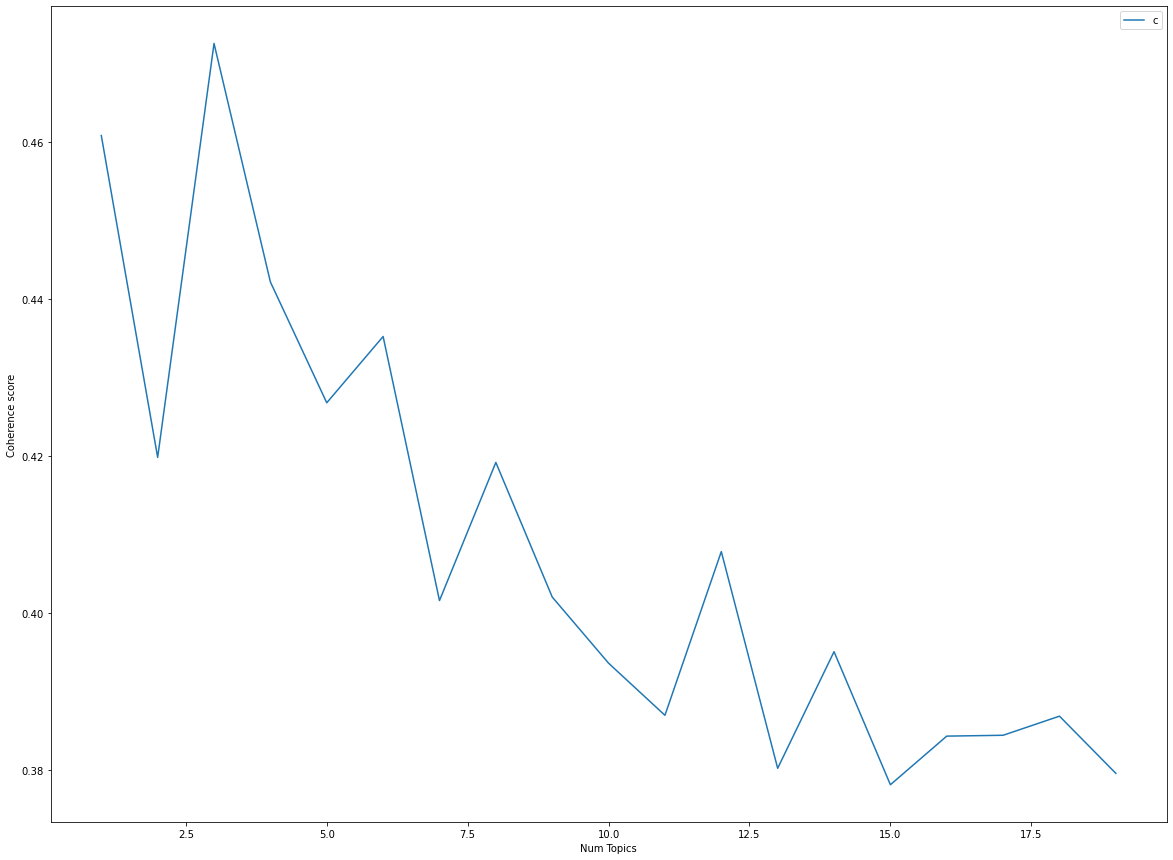

In [100]:
# Show graph
limit=20; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [101]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.4608
Num Topics = 2  has Coherence Value of 0.4198
Num Topics = 3  has Coherence Value of 0.4725
Num Topics = 4  has Coherence Value of 0.4421
Num Topics = 5  has Coherence Value of 0.4267
Num Topics = 6  has Coherence Value of 0.4352
Num Topics = 7  has Coherence Value of 0.4015
Num Topics = 8  has Coherence Value of 0.4191
Num Topics = 9  has Coherence Value of 0.402
Num Topics = 10  has Coherence Value of 0.3936
Num Topics = 11  has Coherence Value of 0.3869
Num Topics = 12  has Coherence Value of 0.4078
Num Topics = 13  has Coherence Value of 0.3802
Num Topics = 14  has Coherence Value of 0.395
Num Topics = 15  has Coherence Value of 0.3781
Num Topics = 16  has Coherence Value of 0.3843
Num Topics = 17  has Coherence Value of 0.3844
Num Topics = 18  has Coherence Value of 0.3868
Num Topics = 19  has Coherence Value of 0.3795


In [161]:
#display topics in data frame
#https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396
tm_results = ldamallet[corpus]

In [162]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=20)] for n in range(0, ldamallet.num_topics)]

In [163]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)], index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
Term1,feel,doctor,eat,blood,work,covid
Term2,day,test,food,sugar,home,type
Term3,week,ac,carbs,high,hospital,health
Term4,work,year,lot,time,today,care
Term5,weight,insulin,meal,stress,time,risk
Term6,lose,month,low,number,year,sick
Term7,walk,metformin,carb,long,talk,control
Term8,bit,diagnose,diet,exercise,give,issue
Term9,symptom,low,hard,bg,advice,virus
Term10,bad,glucose,hour,body,wait,disease


In [164]:
# set column width
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'], index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )
topics_df

<ipython-input-164-22448409583d>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Terms per Topic
Topic1,"feel, day, week, work, weight, lose, walk, bit, symptom, bad, lot, gym, night, happen, end, great, covid, felt, ill, diagnosis"
Topic2,"doctor, test, ac, year, insulin, month, metformin, diagnose, low, glucose, diet, week, med, exercise, change, level, stop, reading, check, medication"
Topic3,"eat, food, carbs, lot, meal, low, carb, diet, hard, hour, thing, water, keto, fast, cut, easy, sugar, add, stuff, rice"
Topic4,"blood, sugar, high, time, stress, number, long, exercise, bg, body, problem, morning, normal, control, sleep, make, level, effect, change, kind"
Topic5,"work, home, hospital, today, time, year, talk, give, advice, wait, insurance, visit, guess, state, order, meter, live, strip, situation, friend"
Topic6,"covid, type, health, care, risk, sick, control, issue, virus, disease, diabetic, question, pandemic, mask, hand, case, infection, wear, patient, home"


In [165]:
#export list of topics
topics_df.to_csv('diabetes_covid_topics.csv', index = False)

In [166]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
#https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-2-602ffb38d396

from gensim.models.ldamodel import LdaModel

def convertldaMalletToldaGen(mallet_model):
    model_gensim = LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha) 
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

In [167]:
ldagensim = convertldaMalletToldaGen(ldamallet)

In [168]:
import pyLDAvis.gensim as gensimvis
vis_data = gensimvis.prepare(ldagensim, corpus, id2word, sort_topics=False)
pyLDAvis.display(vis_data)

IndexError: index 6 is out of bounds for axis 0 with size 6

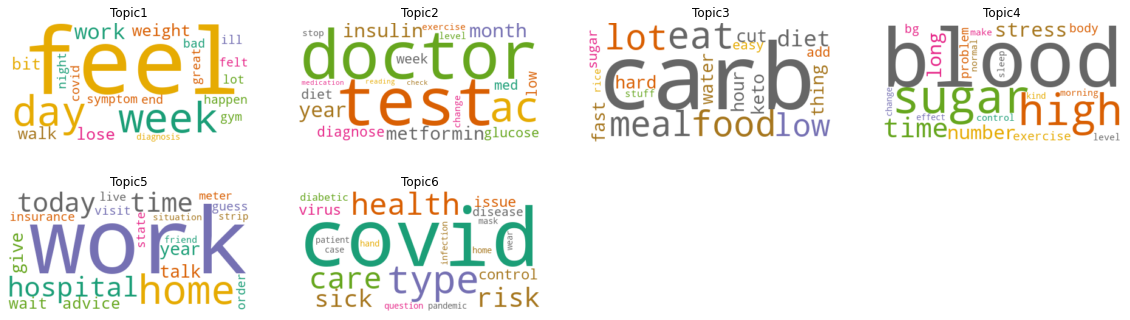

In [169]:
#word cloud
# initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

# set the figure size
plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots for each topic
for i in range(28):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

In [170]:
#find weight of each topic per row
#https://medium.com/swlh/topic-modeling-lda-mallet-implementation-in-python-part-3-ab03e01b7cd7
topic_weights_covid = pd.DataFrame.from_records([{v: k for v, k in row} for row in tm_results])
topic_weights_covid.columns = ['Topic ' + str(i) for i in range(1,7)]
topic_weights_covid

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,0.153846,0.169231,0.131624,0.220513,0.145299,0.179487
1,0.154321,0.172840,0.154321,0.191358,0.154321,0.172840
2,0.127695,0.139303,0.144279,0.242123,0.147595,0.199005
3,0.186325,0.153846,0.162393,0.227350,0.128205,0.141880
4,0.291874,0.142620,0.162521,0.126036,0.139303,0.137645
...,...,...,...,...,...,...
2677,0.150327,0.145425,0.160131,0.161765,0.220588,0.161765
2678,0.106195,0.155359,0.311701,0.188791,0.140610,0.097345
2679,0.273381,0.176659,0.107114,0.122302,0.184652,0.135891
2680,0.228836,0.208995,0.150794,0.141534,0.150794,0.119048


In [171]:
#find topics per month / year
#topic_weights2018['month'] = diabetes2018["Publish Date"].dt.month
#topic_weights2018['year'] = diabetes2018["Publish Date"].dt.year
topic_weights_covid['month_year'] = diabetes_covid.month
topic_weights_covid

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,month_year
0,0.153846,0.169231,0.131624,0.220513,0.145299,0.179487,20-Apr
1,0.154321,0.172840,0.154321,0.191358,0.154321,0.172840,20-Apr
2,0.127695,0.139303,0.144279,0.242123,0.147595,0.199005,20-Apr
3,0.186325,0.153846,0.162393,0.227350,0.128205,0.141880,20-May
4,0.291874,0.142620,0.162521,0.126036,0.139303,0.137645,20-May
...,...,...,...,...,...,...,...
2677,0.150327,0.145425,0.160131,0.161765,0.220588,0.161765,21-Feb
2678,0.106195,0.155359,0.311701,0.188791,0.140610,0.097345,21-Feb
2679,0.273381,0.176659,0.107114,0.122302,0.184652,0.135891,21-Feb
2680,0.228836,0.208995,0.150794,0.141534,0.150794,0.119048,21-Feb


In [172]:
#find dominant topic of the record
topic_weights_covid['Dominant'] = topic_weights_covid.drop('month_year', axis=1).idxmax(axis=1)
topic_weights_covid

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,month_year,Dominant
0,0.153846,0.169231,0.131624,0.220513,0.145299,0.179487,20-Apr,Topic 4
1,0.154321,0.172840,0.154321,0.191358,0.154321,0.172840,20-Apr,Topic 4
2,0.127695,0.139303,0.144279,0.242123,0.147595,0.199005,20-Apr,Topic 4
3,0.186325,0.153846,0.162393,0.227350,0.128205,0.141880,20-May,Topic 4
4,0.291874,0.142620,0.162521,0.126036,0.139303,0.137645,20-May,Topic 1
...,...,...,...,...,...,...,...,...
2677,0.150327,0.145425,0.160131,0.161765,0.220588,0.161765,21-Feb,Topic 5
2678,0.106195,0.155359,0.311701,0.188791,0.140610,0.097345,21-Feb,Topic 3
2679,0.273381,0.176659,0.107114,0.122302,0.184652,0.135891,21-Feb,Topic 1
2680,0.228836,0.208995,0.150794,0.141534,0.150794,0.119048,21-Feb,Topic 1


In [173]:
#extract topic weighting
topic_weights_covid.to_csv('topic_weight_covid.csv', index = False)

In [174]:
#percentage of dominant topics per a month
topic_dominant_covid = topic_weights_covid.groupby('month_year')['Dominant'].value_counts(normalize=True).unstack()
topic_dominant_covid

Dominant,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
month_year,,,,,,
20-Apr,0.163823,0.129693,0.129693,0.191126,0.170648,0.215017
20-Aug,0.162500,0.175000,0.143750,0.218750,0.200000,0.100000
20-Dec,0.220513,0.169231,0.153846,0.184615,0.184615,0.087179
20-Feb,NaN,NaN,0.125000,0.125000,0.125000,0.625000
20-Jul,0.235023,0.142857,0.156682,0.152074,0.138249,0.175115
20-Jun,0.155080,0.203209,0.117647,0.106952,0.235294,0.181818
20-Mar,0.131403,0.111359,0.184855,0.131403,0.198218,0.242762
20-May,0.119048,0.222222,0.166667,0.134921,0.218254,0.138889
20-Nov,0.180328,0.147541,0.147541,0.147541,0.172131,0.204918


In [175]:
#dominant topic by year
topic_dominant_covid['Dominant'] = topic_dominant_covid.idxmax(axis=1)
topic_dominant_covid

Dominant,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Dominant
month_year,,,,,,,
20-Apr,0.163823,0.129693,0.129693,0.191126,0.170648,0.215017,Topic 6
20-Aug,0.162500,0.175000,0.143750,0.218750,0.200000,0.100000,Topic 4
20-Dec,0.220513,0.169231,0.153846,0.184615,0.184615,0.087179,Topic 1
20-Feb,NaN,NaN,0.125000,0.125000,0.125000,0.625000,Topic 6
20-Jul,0.235023,0.142857,0.156682,0.152074,0.138249,0.175115,Topic 1
20-Jun,0.155080,0.203209,0.117647,0.106952,0.235294,0.181818,Topic 5
20-Mar,0.131403,0.111359,0.184855,0.131403,0.198218,0.242762,Topic 6
20-May,0.119048,0.222222,0.166667,0.134921,0.218254,0.138889,Topic 2
20-Nov,0.180328,0.147541,0.147541,0.147541,0.172131,0.204918,Topic 6


In [176]:
topic_dominant_covid.to_csv('topic_dominant_covid.csv', index = False)

In [177]:
#revalue row index
diabetes_covid.index = range(2682)
diabetes_covid

,Post ID,Author,Publish Date,month,Body,text_lemmatized,classification,permalink,Title,Dominant,month_year
0,fooc0vx,smokinroundhouse,2020-04-26 14:25,20-Apr,"There are many things that can affect insulin sensitivity. Any changes to routine, stress, getting sick, changes in exercise, can all play a factor. \n\nBut, your spikes seem pretty normal to me, TBH.","[thing, affect, insulin, sensitivity, change, routine, stress, get, sick, change, exercise, play, factor, spike, normal, tbh]",covid,/r/diabetes/comments/g8hkh6/super_bad_insulin_resistance/fooc0vx/,0,Topic 4,20-Apr
1,fov3uto,95_5000,2020-04-28 10:29,20-Apr,Why do we need anecdotal opinions when we have clinical data?,"[need, anecdotal, opinion, clinical, data]",covid,/r/diabetes/comments/g9oud8/which_glucometer_is_better/fov3uto/,0,Topic 2,20-Apr
2,fp3gpgx,Subpar_diabetic,2020-04-30 13:36,20-Apr,"One important thing to remember is that stress can and will affect your blood sugar so if youÃ¢â‚¬â„¢re under a lot of stress, like right now for instance, remember to keep your eye on it very frequently. Always keep your supplies stocked up and remember that nothing is more important than your health","[important, remember, stress, affect, blood, sugar, lot, stress, right, instance, remember, eye, frequently, supply, stock, remember, important, health]",covid,/r/diabetes/comments/gb3jaj/literally_just_got_diagnosed_ten_minutes_ago/fp3gpgx/,0,Topic 5,20-Apr
3,fp7dynb,Khaetra,2020-05-01 14:33,20-May,"150-160 isn't super bad, but still a bit high. She should try lowering her carbs a bit more and try to fit in some type of exercise (even a brisk walk helps). And tell her not to stress, as stress does raise your numbers.","[super, bit, high, try, lower, carbs, bit, try, fit, type, exercise, brisk, walk, help, tell, stress, stress, raise, number]",covid,/r/diabetes/comments/gbqfts/hey_there_my_wife_was_recently_diagnosed_with/fp7dynb/,0,Topic 4,20-May
4,gdtiux,aliensREVEALED,2020-05-05 0:55,20-May,Hi everyone. I have Type 2 diabetes. I get tired very easily. I try to nap daily which helps. When I find I'm too tired to enjoy myself I'll go for a nap to refresh. Do you suffer from diabetes fatigue? How do you feel? Do you find after a few hours awake you feel exhausted again?,"[type, tire, easily, try, nap, daily, help, tire, enjoy, ill, nap, refresh, suffer, fatigue, feel, hour, awake, feel, exhaust]",covid,/r/diabetes/comments/gdtiux/diabetes_fatigue/,DIABETES FATIGUE,Topic 5,20-May
...,...,...,...,...,...,...,...,...,...,...,...
2677,gof11qu,pennynotrcutt,2021-02-22 18:51,21-Feb,I had mine done last week. I canâ€™t really speak for any place but the one I went to but I had to get a COVID test within 72 hours before and everyone wore a mask until I was shown into my room which was private. The biggest hurdle IMO if youâ€™re in the US is getting insurance to cover it all. I have the exact same problem as you described.,"[week, speak, place, go, covid, test, hour, wore, mask, show, room, private, big, hurdle, imo, get, insurance, cover, exact, problem, described]",covid,/r/type2diabetes/comments/lpy7i8/falling_asleep_on_the_couch/gof11qu/,0,Topic 3,20-Feb
2678,gonj7lj,Superb_Science_3861,2021-02-24 17:28,21-Feb,"Thank you!! My diet is pretty low carb most of the time. I try to stay under 30 daily. Sometimes more but only a little. I donâ€™t exercise as of yet, Canada is pretty locked down but I am starting a new routine in the next week or so as the gyms open. I attribute my success to the low carb diet I follow 80% of the time. I want to stress to those reading I still cheat. I have more food than normal on those cheats as well. It may not work for everyone but it seems to for me. I think a key to long term success isnâ€™t cutting yourself off from foods you love, foods that may have contributed to your diagnosis in the first place, but rather the moderation theyâ€™re consumed in. I mean I used to eat a large pizza with 2L of coke in a sitting (no joke). Now I may have pizza once a mo

In [178]:
#merge dataframes together
diabetes_covid['Dominant'] = topic_weights_covid['Dominant']
diabetes_covid['month_year'] = topic_weights_covid['month_year']
diabetes_covid.tail()

,Post ID,Author,Publish Date,month,Body,text_lemmatized,classification,permalink,Title,Dominant,month_year
2677,gof11qu,pennynotrcutt,2021-02-22 18:51,21-Feb,I had mine done last week. I canâ€™t really speak for any place but the one I went to but I had to get a COVID test within 72 hours before and everyone wore a mask until I was shown into my room which was private. The biggest hurdle IMO if youâ€™re in the US is getting insurance to cover it all. I have the exact same problem as you described.,"[week, speak, place, go, covid, test, hour, wore, mask, show, room, private, big, hurdle, imo, get, insurance, cover, exact, problem, described]",covid,/r/type2diabetes/comments/lpy7i8/falling_asleep_on_the_couch/gof11qu/,0,Topic 5,21-Feb
2678,gonj7lj,Superb_Science_3861,2021-02-24 17:28,21-Feb,"Thank you!! My diet is pretty low carb most of the time. I try to stay under 30 daily. Sometimes more but only a little. I donâ€™t exercise as of yet, Canada is pretty locked down but I am starting a new routine in the next week or so as the gyms open. I attribute my success to the low carb diet I follow 80% of the time. I want to stress to those reading I still cheat. I have more food than normal on those cheats as well. It may not work for everyone but it seems to for me. I think a key to long term success isnâ€™t cutting yourself off from foods you love, foods that may have contributed to your diagnosis in the first place, but rather the moderation theyâ€™re consumed in. I mean I used to eat a large pizza with 2L of coke in a sitting (no joke). Now I may have pizza once a month and itâ€™s maybe 4-6 slices. I also avoid sugars almost entirely. So many sugar substitutes now I find it super easy. Even if the treat is sweetened with Maltitol which in my opinion is the best tasting lol, itâ€™s still much better than regular granulated sugar!","[diet, low, carb, time, try, stay, daily, little, exercise, canada, lock, start, new, routine, week, gym, open, attribute, success, low, carb, diet, follow, time, stress, reading, cheat, food, normal, cheat, work, think, key, long, term, success, cut, food, love, food, contribute, diagnosis, place, moderation, consume, mean, eat, large, pizza, l, coke, sit, joke, pizza, maybe, slice, avoid, sugar, entirely, sugar, substitute, super, easy, treat, sweeten, maltitol, opinion, best, taste, better, regular, granulate, sugar]",covid,/r/type2diabetes/comments/lrndyr/2nd_a1c_test_done/gonj7lj/,0,Topic 3,21-Feb
2679,lrped8,MrsWorldwidee,2021-02-24 14:50,21-Feb,"I'm a 25 years old female and since I moved to UK 2 years ago, my physical health started to deteriorate. Since I was 16-17, my weight was around 60-70kg for 158cm. During my uni days I used to work on the rowing machine, walk a lot, be more active in general. Here in UK I'm studying too, but I also have a 2yrs old daughter. After I gave birth my weight was about 78-80kg max! Last year in May I had 83kg. I blamed it on covid and I thought that I'll get better. But I just got worse... I'm 100 kg at the moment and I hate myself. On top of that, in the past 6-7 months I'm urinating way more often, especially in the night. Sometimes I woke up and I feel very thirsty. What I also noticed is that I have dry, cracked skin on my joints and hands especially and I recently started to have small cuts on my fingers or hands from paper or while making a sandwich, but it takes forever to heal. Since June I also stared wearing glasses. Moreover, I feel constantly tired. No matter how much I'd sleep, I will still feel sleepy. Sometimes I pass out instantly. I feel so bad in my body and I feel that something is wrong with me. I've expressed my concerns to my GP, but they haven't took proper blood tests to check if I have diabetes. The kits in the pharmacies here are way too expensive. What should I do? How can I get checked?","[year, old, female, move, uk, year, physical, health, deteriorate, weight, kg, cm, uni, day, work, row, machine, walk, lot, active, general, uk, stu

In [179]:
#export dataframe
diabetes_covid.to_csv('diabetes_covid_lda.csv', index = False)